# **Submission Guidelines**

- Submit a **Jupyter Notebook (.ipynb)** file with the complete implementation.
- **Use of LLM tools, any form of cheating is strictly prohibited**; violations will result in a **zero score** in entire assignmnet.
- Ensure the code is **well-commented, structured**, and follows best coding practices.  
  - Clearly define **functions and classes** to improve modularity and readability.
  - **Object-Oriented Programming (OOP)** principles are preferred but not mandatory.
- Provide **proper visualizations** (e.g., accuracy curves, decision boundaries) where applicable.
- Include a **brief analysis** of results, explaining the model's performance:  
  - Discuss **accuracy, loss trends, and key observations**.  
  - Use **clean and well-formatted markdown** for explanations.  
- **All dependencies must be correctly installed**, and the notebook **must run without errors**.  
  - If the submitted notebook fails to run, you will be **awarded zero**, and **no excuses will be accepted**.
- **Equation formatting:**  
  - You can write equations **directly in Markdown** using **LaTeX syntax**.  
  - If you provide **handwritten proofs**, ensure they are **properly embedded as images** in the notebook.
- **Before submission**, ensure that all images, visualizations, and proofs are **properly embedded** within your Jupyter Notebook.
- Submit a **ZIP file** containing the following:  
  1. **Jupyter Notebook (`.ipynb` file)** with your solutions.  
  2. **All source images** (if embedded in notebook externally) used in the notebook (if any).  
  3. Ensure that images (if used) are **embedded in the notebook** at appropriate location
- **File Naming Format:**  
  - The ZIP file must be named in the following format:  
    ```
    <SRNo>_<YourName>_MLDS_Assignment1.zip
    ```  
    (Replace `<SRNo>` with your serial number and `<YourName>` with your full name.)


# **Problem Statement: 1**  

Implement a **Support Vector Machine (SVM) classifier** using both its **primal** and **dual** formulations **from scratch using numpy**.

## **1. Primal Form (Soft-Margin SVM)**  
- Implement the **primal form** of SVM with a **soft margin**, using **Hinge Loss** optimization.
- Optimize the objective function using **Stochastic Gradient Descent (SGD)** to update the model parameters efficiently.  

## **2. Dual Form (Kernel SVM)**
- Implement the **dual form** of SVM using the **Sequential Minimal Optimization (SMO) algorithm**.   
- Extend the model to support **kernel functions** (e.g., linear, polynomial, and RBF) for **nonlinear classification**.

### **Note:**
- You **must** implement the core SVM algorithms from scratch using **NumPy only**.
- However, you **may** use external libraries for **trivial tasks**, such as:
  - **Plotting** (e.g., Matplotlib, Seaborn)
  - **Performance evaluation metrics** (e.g., Scikit-learn for accuracy, precision, recall, F1-score)
  - **Dataset handling** (e.g., Pandas for reading CSV files)

<!--
### **Implementation Details**  
Your implementation should include:  
✅ Data preprocessing (feature scaling, train-validation-test split)  
✅ Training and prediction functions for both **primal** and **dual** SVM  
✅ Model evaluation using **accuracy** and performance metrics  

🚀 **Goal**: Compare both implementations and analyze their efficiency, accuracy, and suitability for different datasets. -->


## **Dataset Description**  
The **Diabetes dataset** consists of medical predictor variables and a binary outcome indicating whether a person has diabetes or not. The dataset contains the following features:

- **Pregnancies**: Number of times pregnant  
- **Glucose**: Plasma glucose concentration  
- **BloodPressure**: Diastolic blood pressure (mm Hg)  
- **SkinThickness**: Triceps skin fold thickness (mm)  
- **Insulin**: 2-Hour serum insulin (mu U/ml)  
- **BMI**: Body mass index (weight in kg/(height in m)^2)  
- **DiabetesPedigreeFunction**: Diabetes pedigree function  
- **Age**: Age in years  
- **Outcome**: Target variable (0: No Diabetes, 1: Diabetes)  

---

- Note: Split the dataset into **Train (70%)**, **Validation (15%)**, and **Test (15%)** sets
- You can use the following code as a reference. You are free to make necessary modifications to the function if required. 🚀

In [1]:
from typing import Tuple
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


# make necessary changes if needed

def get_data() -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:

    # Load your data (replace 'Diabetes.csv' with the actual file path)
    data = pd.read_csv('Diabetes.csv')

    # Assume the zero values are poeple who did not take the test, and so they have normal values of normal human being
    data['Glucose'] = data['Glucose'].replace(0, 90)
    data['BloodPressure'] = data['BloodPressure'].replace(0, 90)
    data['SkinThickness'] = data['SkinThickness'].replace(0, 20)
    data['Insulin'] = data['Insulin'].replace(0, 110)
    data['BMI'] = data['BMI'].replace(0, 25)

    # Assuming 'Outcome' is the column name for the target variable
    X = data.drop('Outcome', axis=1).values
    y = data['Outcome'].values

    # Split the data into training (70%) and temp (30%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Convert the target variable to binary -1, 1
    y_train = 2 * y_train - 1
    y_temp = 2*y_temp - 1

    #normalize the data
    mu = X_train.mean(axis=0)
    sigma = X_train.std(axis=0)
    X_train = (X_train - mu) / sigma
    X_temp = (X_temp - mu) / sigma

    # Split the temp set into validation (50% of 30%) and testing (50% of 30%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    return X_train, X_val, X_test, y_train, y_val, y_test


## **Mathematical Formulation**

## **Primal form of the soft-margin SVM Problem Formulation**
The soft-margin SVM aims to find a hyperplane that maximizes the margin while allowing some misclassification. The objective function to minimize is:

$$
L(W, b) = \frac{\lambda}{2} ||W||^2 + \sum_{i=1}^{N} \max(0, 1 - y_i (W^T x_i + b))
$$

where:  
- $W$ is the **weight vector**  
- $b$ is the **bias**  
- $\lambda$ is the **regularization parameter**  
- $y_i \in \{-1, 1\}$ are the **labels**  
- $x_i$ are the **feature vectors**  




## **dual form of the soft-margin SVM Problem Formulation**

$$
\max_{\alpha} \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$

subject to:

$$
0 \leq \alpha_i \leq C, \quad \forall i
$$

$$
\sum_{i=1}^{N} \alpha_i y_i = 0
$$

where:  
- $ \alpha_i $ are the **Lagrange multipliers**  
- $ y_i \in \{-1, 1\} $ are the **class labels**  
- $ K(x_i, x_j) $ is the **kernel function** (linear, polynomial, RBF, etc.)  
- $ C $ is the **regularization parameter**  


## **Evaluating Performance**
1. Evaluate the performance of the models on the test set and report the accuracy, precision, recall, and F1 score. Include a brief analysis of results, explaining the model's performance (accuracy, loss trends, and key observations).Observations and conclusions on experiments should be done in markdown.

2. **Few examples of experiments to be conducted:**
    - Hyperparameter tuning
    - Comparison between both approches
    - Comparison between effect of different kernals
    - Include other experiments that you will conduct

- **Important**: Your will be evaluated based on quality of different experiments conducted and plots, and perfomance metrics.

---
---

In [2]:
# read the data
df = pd.read_csv('Diabetes.csv')
#print(df.head())

(df == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Observation and Actions:**
- data is imbalanced.
- Have zero values
- Replace zero with avg human values of respective test
- Shifted labels from 0,1 to -1,+1

In [3]:
# imports 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

np.random.seed(42)

In [4]:
# define a class for HingeLoss
class HingeLoss():
    def __init__(self, X, y, y_pred, l2_penalty=0.1, W=None, b=None):
        """
        X: np.ndarray or single sample
        y: np.ndarray or scalar
        y_pred: np.ndarray or scalar
        l2_penalty: float
        W: np.ndarray or None
        b: scalar or None
        """
        self.X = X
        self.y = y
        self.y_pred = y_pred
        self.l2_penalty = l2_penalty
        self.W = W
        self.b = b
        self.hinge_loss_only_margin()
   
    def hinge_loss_only_margin(self):
        """
        Compute the hinge loss
        return: hinge loss using just margin value (scalar) or vector
        """
        margin = self.y * self.y_pred
        # Handle single sample case
        self.margin_loss = 0
        if np.isscalar(margin) or np.ndim(margin) == 0:
            self.margin_loss = max(0, 1 - margin)
        else:
            self.margin_loss = np.maximum(0, 1 - margin)
        
        return self.margin_loss
        
   
    def hinge_loss_with_l2_regularization(self):
        """
        Compute the hinge loss with L2 regularization
        return: hinge loss value (scalar) or vector

        """
        #base_loss = self.margin_loss

        if np.isscalar(self.margin_loss) or self.X.ndim == 1:
            base_loss = self.margin_loss
        else:
            base_loss = np.sum(self.margin_loss)

        if self.W is None:
            raise ValueError("Weights W must be provided to compute L2 regularization.")
        self.l2_regularization = 0.5 * self.l2_penalty * (np.linalg.norm(self.W, 2)**2 ) #bais is not used to calculate loss in svm "+ self.b**2"

        return base_loss + self.l2_regularization
   
    def gradient_only_margin(self):
        """
        Compute the gradient of hinge loss wrt just margin with respect to W and b.
        return: gradient of W and b (np.ndarray or scalar)
        """
        grad = np.zeros_like(self.W)
        # For a single sample, if margin_loss > 0, the sub-gradient is -y*X, else 0.
        # check if margin_loss is vector or scalar
        if np.isscalar(self.margin_loss) or self.X.ndim == 1:
            if self.margin_loss > 0:
                grad_w = -self.y * self.X
                grad_b = -self.y
            else:
                grad_w = np.zeros_like(self.W)
                grad_b = 0
        else:
            mask = self.margin_loss > 0
            #print(mask.shape)
            #print(self.y[mask])
            #print(self.X[mask])
            if np.any(mask):
                y_mask = self.y[mask]
                y_broadcasted = y_mask[:, np.newaxis]
                grad_w = np.sum(- y_broadcasted * self.X[mask], axis=0)
                grad_b = np.sum(-self.y[mask])
            else:
                grad_w = np.zeros_like(self.W)
                grad_b = 0
        return grad_w, grad_b
    
    def gradient_with_l2_regularization(self):
        """
        Compute the gradient of hinge loss with L2 regularization wrt W and b.
        return: gradient of W and b (np.ndarray or scalar)
        """
        grad_w, grad_b = self.gradient_only_margin()
        if self.W is None:
            raise ValueError("Weights W must be provided to compute L2 regularization.")
        grad_w += self.l2_penalty * self.W
        return grad_w, grad_b

# Metrics class
class Metrics():
    """
    A simple class to calculate accuracy, precision, recall, and f1 score 
    """
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
   
    def calculate_metrics(self):
        accuracy = accuracy_score(self.y_true, self.y_pred)
        precision = precision_score(self.y_true, self.y_pred)
        recall = recall_score(self.y_true, self.y_pred)
        f1 = f1_score(self.y_true, self.y_pred)
        return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# check the implementation for complete data
X_train, X_val, X_test, y_train, y_val, y_test = get_data()
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
W = np.random.rand(X_train.shape[1])
b = np.random.rand(1)
y_pred = np.dot(X_train, W)+ b
hinge_loss = HingeLoss(X_train, y_train, y_pred, l2_penalty=1, W=W, b=b)
print(np.sum(hinge_loss.hinge_loss_only_margin()))
print(hinge_loss.hinge_loss_with_l2_regularization())
print(hinge_loss.gradient_only_margin())
print(hinge_loss.gradient_with_l2_regularization())

# check the implementation for single sample data
print("SGD check")
for i in range(2):
    X = X_train[i]
    y = y_train[i]
    y_pred = np.dot(X, W) + b
    hinge_loss = HingeLoss(X, y, y_pred, l2_penalty=1, W=W, b=b)
    print(hinge_loss.hinge_loss_only_margin())
    print(hinge_loss.hinge_loss_with_l2_regularization())
    print(hinge_loss.gradient_only_margin())
    print(hinge_loss.gradient_with_l2_regularization())

(537, 8) (115, 8) (116, 8) (537,) (115,) (116,)
505.66277678207945
507.03310479839985
(array([ 40.65371884,  -9.81746661,  76.98004199,  41.36939808,
         9.04764658,  -9.94341139, -34.21927663,  69.51271099]), np.int64(154))
(array([ 41.02825896,  -8.8667523 ,  77.71203593,  41.96805656,
         9.20366522,  -9.78741687, -34.16119302,  70.37888713]), np.int64(154))
SGD check
[0.]
[1.37032802]
(array([0., 0., 0., 0., 0., 0., 0., 0.]), 0)
(array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615]), 0)
[1.09878926]
[2.46911728]
(array([ 0.63260632, -1.21320025,  0.3939924 , -0.68149289, -0.25758971,
       -0.19257437, -0.29416766,  0.71699246]), np.int64(1))
(array([ 1.00714644, -0.26248595,  1.12598634, -0.08283441, -0.10157107,
       -0.03657985, -0.23608405,  1.5831686 ]), np.int64(1))


In [5]:
# SVM class
class SVM():
    def __init__(self, X, y, l2_penalty=1, learning_rate=0.01, num_epochs=100):
        """
        args: 
        X: np.ndarray
        y: np.ndarray
        l2_penalty: float
        learning_rate: float
        num_epochs: int
        """
        self.X = X
        self.y = y
        self.l2_penalty = l2_penalty
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.W = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.metrics = []
   
    def initialize_weights(self):
        """
        initialize the weights and bias using random values
        """
        self.W = np.random.rand(self.X.shape[1])
        self.b = np.random.rand(1)
   
    def fit(self, X_val, y_val):
        """
        Fit the SVM model
        arg:
        X_val: np.ndarray
        y_val: np.ndarray

        """
        self.initialize_weights()
        for epoch in tqdm(range(self.num_epochs)):
            for i in range(self.X.shape[0]):
                X = self.X[i]
                y = self.y[i]
                y_pred = np.dot(X, self.W) + self.b
                hinge_loss = HingeLoss(X, y, y_pred, l2_penalty=self.l2_penalty, W=self.W, b=self.b)
                grad_W, grad_b = hinge_loss.gradient_with_l2_regularization()
                self.W -= self.learning_rate * grad_W
                self.b -= self.learning_rate * grad_b
                
            y_train_pred = np.dot(self.X, self.W) + self.b
            train_loss = HingeLoss(self.X, self.y, y_train_pred, self.l2_penalty, self.W, self.b).hinge_loss_with_l2_regularization()
            self.losses.append(train_loss)

            # Validation loss
            y_val_pred = np.dot(X_val, self.W) + self.b
            hinge_loss_val = HingeLoss(X_val, y_val, y_val_pred, l2_penalty=self.l2_penalty, W=self.W, b=self.b)
            self.val_losses.append(hinge_loss_val.hinge_loss_with_l2_regularization())
            # Metrics
            y_train_pred = np.sign(np.dot(self.X, self.W) + self.b) 
            y_val_pred =  np.sign(np.dot(X_val, self.W) + self.b)
            metrics_train = Metrics(self.y, y_train_pred).calculate_metrics()
            metrics_val = Metrics(y_val, y_val_pred).calculate_metrics()
            self.metrics.append({'train': metrics_train, 'val': metrics_val, 'epoch': epoch})
            print(f"Epoch {epoch}: Train Loss: {self.losses[-1]}, Val Loss: {self.val_losses[-1]}",  end='\r', flush=True)
        print()
   
    def predict(self, X):
        """
        Predict the target variable
        arg:
        X: np.ndarray
        """
        return np.sign(np.dot(X, self.W) + self.b)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99: Train Loss: 273.4348797580444, Val Loss: 69.948227119667215


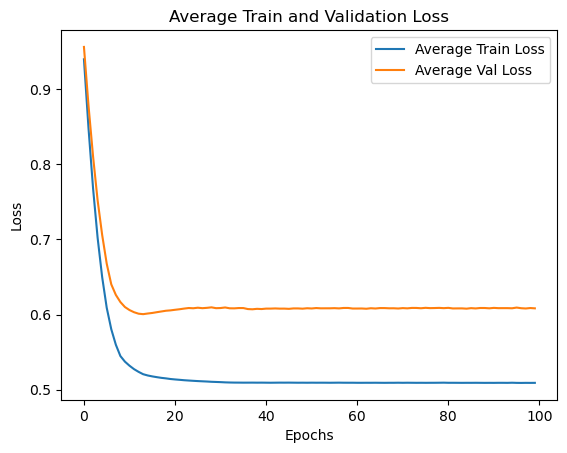

In [6]:

svm = SVM(X_train, y_train, l2_penalty=0.1, learning_rate=0.001, num_epochs=100)

svm.fit(X_val, y_val)

# length of data
train_len = X_train.shape[0]
val_len = X_val.shape[0]
test_len = X_test.shape[0]

# divide by length to get the average
train_loss = np.array(svm.losses) / train_len
val_loss = np.array(svm.val_losses) / val_len

# Plot the losses for training and validation
plt.plot(train_loss, label='Average Train Loss')
plt.plot(val_loss, label='Average Val Loss')
plt.title('Average Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
# print the metrics
def metrics_to_dataframe(metrics):
    """
    Convert the metrics to a pandas DataFrame
    args:
    metrics: list of dictionaries
    return: pd.DataFrame
    """
    rows = []
    for entry in metrics:
        row = {
            'epoch': entry['epoch'],
            'train_accuracy': entry['train']['accuracy'],
            'train_precision': entry['train']['precision'],
            'train_recall': entry['train']['recall'],
            'train_f1': entry['train']['f1'],
            'val_accuracy': entry['val']['accuracy'],
            'val_precision': entry['val']['precision'],
            'val_recall': entry['val']['recall'],
            'val_f1': entry['val']['f1']
        }
        rows.append(row)
    df = pd.DataFrame(rows)
    return df
    
metrics_df = metrics_to_dataframe(svm.metrics)
metrics_df

epoch  train_accuracy  train_precision  train_recall  train_f1  \
0       0        0.625698         0.476974      0.775401  0.590631   
1       1        0.651769         0.500000      0.775401  0.607966   
2       2        0.674115         0.521739      0.770053  0.622030   
3       3        0.685289         0.534351      0.748663  0.623608   
4       4        0.703911         0.557851      0.721925  0.629371   
..    ...             ...              ...           ...       ...   
95     95        0.791434         0.790698      0.545455  0.645570   
96     96        0.791434         0.790698      0.545455  0.645570   
97     97        0.791434         0.790698      0.545455  0.645570   
98     98        0.791434         0.790698      0.545455  0.645570   
99     99        0.791434         0.790698      0.545455  0.645570   

    val_accuracy  val_precision  val_recall    val_f1  
0       0.608696       0.461538       0.750  0.571429  
1       0.608696       0.459016       0.700  0.554455  
2       0.643478       0.491228       0.700  0.577320  
3       0.643478       0.490909       0.675  0.568421  
4       0.660870       0.509804       0.650  0.571429  
..           ...            ...         ...       ...  
95      0.704348       0.588235       0.500  0.540541  
96      0.704348       0.588235       0.500  0.540541  
97      0.704348       0.588235       0.500  0.540541  
98      0.704348       0.588235       0.500  0.540541  
99      0.704348       0.588235       0.500  0.540541  

[100 rows x 9 columns]

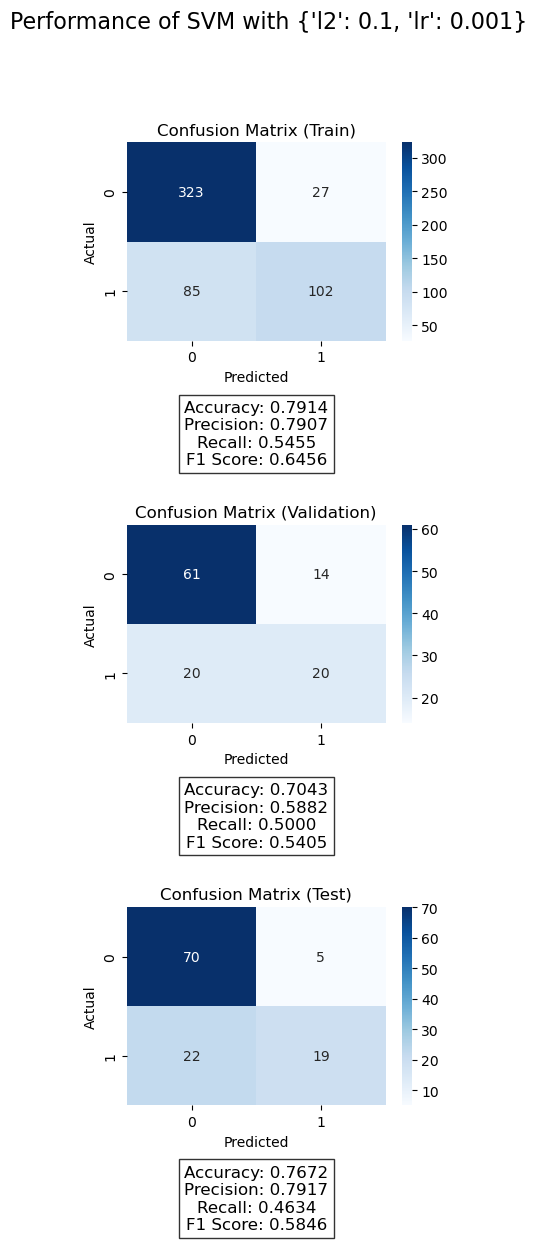

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(X_train, X_test, X_val, y_train, y_test, y_val, svm, model_name, hyper_parameters):
    """
    Plot the confusion matrices for training, validation, and testing sets for the SVM model
    args:
    X_train: np.ndarray
    X_test: np.ndarray
    X_val: np.ndarray
    y_train: np.ndarray
    y_test: np.ndarray
    y_val: np.ndarray
    svm: SVM model of class SVM
    model_name: str
    hyper_parameters: dict
    """
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)
    y_val_pred = svm.predict(X_val)
    
    fig, axes = plt.subplots(3, 1, figsize=(4, 12))
    fig.suptitle(f'Performance of {model_name} with {hyper_parameters}', fontsize=16, y=1.05)
    
    def plot_metrics(ax, y_true, y_pred, title):
        """
        Plot the confusion matrix and metrics
        args:
        ax: plt.Axes
        y_true: np.ndarray
        y_pred: np.ndarray
        title: str
        """
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(title)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        metrics_text = (
            f'Accuracy: {accuracy:.4f}\n'
            f'Precision: {precision:.4f}\n'
            f'Recall: {recall:.4f}\n'
            f'F1 Score: {f1:.4f}'
        )
        ax.text(0.5, -0.3, metrics_text, transform=ax.transAxes, ha='center', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    plot_metrics(axes[0], y_train, y_train_pred, 'Confusion Matrix (Train)')
    plot_metrics(axes[1], y_val, y_val_pred, 'Confusion Matrix (Validation)')
    plot_metrics(axes[2], y_test, y_test_pred, 'Confusion Matrix (Test)')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(X_train, X_test, X_val, y_train, y_test, y_val, svm,"SVM", {"l2" : 0.1, "lr" :0.001})

In [9]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

l2_penalty_list = [0.1, 1, 2]
lr_list = [0.001, 0.01, 0.1]
max_iter_list = 100

results = {
    'configurations': [],
    'models': [],
    'metrics_dfs': [],
    'losses': []
}

# Grid search
for l2_penalty in tqdm(l2_penalty_list, desc='L2 Penalty Search'):
    for lr in tqdm(lr_list, desc='Learning Rate Search', leave=False):
        # Train model
        svm = SVM(X_train, y_train, 
                 l2_penalty=l2_penalty, 
                 learning_rate=lr, 
                 num_epochs=max_iter_list)
        svm.fit(X_val, y_val)
        
        # Store results
        config = f"L2={l2_penalty}, LR={lr}"
        results['configurations'].append(config)
        results['models'].append(svm)
        results['metrics_dfs'].append(metrics_to_dataframe(svm.metrics))
        results['losses'].append({
            'train_loss': svm.losses,
            'val_loss': svm.val_losses
        })

L2 Penalty Search:   0%|          | 0/3 [00:00<?, ?it/s]

Learning Rate Search:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99: Train Loss: 273.4862208894618, Val Loss: 70.009961464288459


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99: Train Loss: 276.96160726623805, Val Loss: 69.11936816833455


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99: Train Loss: 317.68619277670086, Val Loss: 76.80167443151555


Learning Rate Search:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99: Train Loss: 335.3360159928343, Val Loss: 76.171514115116189


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99: Train Loss: 330.73946245192, Val Loss: 75.3361047871486385


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99: Train Loss: 330.1610390935413, Val Loss: 70.9460675441716


Learning Rate Search:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99: Train Loss: 354.84987741895515, Val Loss: 78.03298887942161


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99: Train Loss: 350.11501235920315, Val Loss: 77.22333162502075


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 99: Train Loss: 350.3334220370012, Val Loss: 74.98703252059417


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_hyperparameter_analysis_grid_8_subplots(results, X_train, X_val, X_test, y_train, y_val, y_test, filename):
    """
    Plot the hyperparameter analysis for the SVM model
    args:
    results: dict
    X_train: np.ndarray
    X_val: np.ndarray
    X_test: np.ndarray
    y_train: np.ndarray
    y_val: np.ndarray
    y_test: np.ndarray
    filename: str
    """
    n_rows = len(results['configurations'])
    fig, axes = plt.subplots(n_rows, 8, figsize=(30, 6 * n_rows))
    
    if n_rows == 1:
        axes = np.expand_dims(axes, axis=0)
    
    train_len = len(X_train)
    val_len = len(X_val)
    
    for idx, (config, metrics_df, losses, model) in enumerate(zip(
        results['configurations'],
        results['metrics_dfs'],
        results['losses'],
        results['models']
    )):
        train_loss = np.array(losses['train_loss']) / train_len
        val_loss = np.array(losses['val_loss']) / val_len
        
        ax_loss = axes[idx, 0]
        ax_loss.plot(train_loss, label='Train Loss')
        ax_loss.plot(val_loss, label='Val Loss')
        ax_loss.set_title(f'{config}\nLoss Curves', fontsize=10)
        ax_loss.legend(fontsize=8)
        
        ax_acc = axes[idx, 1]
        ax_acc.plot(metrics_df['train_accuracy'], label='Train')
        ax_acc.plot(metrics_df['val_accuracy'], label='Val')
        ax_acc.set_title('Accuracy Progress', fontsize=10)
        ax_acc.legend(fontsize=8)
        
        ax_prec = axes[idx, 2]
        ax_prec.plot(metrics_df['train_precision'], label='Train')
        ax_prec.plot(metrics_df['val_precision'], label='Val')
        ax_prec.set_title('Precision Progress', fontsize=10)
        ax_prec.legend(fontsize=8)
        
        ax_rec = axes[idx, 3]
        ax_rec.plot(metrics_df['train_recall'], label='Train')
        ax_rec.plot(metrics_df['val_recall'], label='Val')
        ax_rec.set_title('Recall Progress', fontsize=10)
        ax_rec.legend(fontsize=8)
        
        ax_f1 = axes[idx, 4]
        ax_f1.plot(metrics_df['train_f1'], label='Train')
        ax_f1.plot(metrics_df['val_f1'], label='Val')
        ax_f1.set_title('F1 Score Progress', fontsize=10)
        ax_f1.legend(fontsize=8)
        
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)
        
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_val = confusion_matrix(y_val, y_val_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)
        
        ax_cfm_train = axes[idx, 5]
        sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax_cfm_train, cbar=False)
        ax_cfm_train.set_title('Train CM', fontsize=8)
        ax_cfm_train.set_xlabel('Predicted', fontsize=8)
        ax_cfm_train.set_ylabel('Actual', fontsize=8)
        metrics_text_train = (
            f"Acc: {accuracy_score(y_train, y_train_pred):.2f}\n"
            f"Prec: {precision_score(y_train, y_train_pred):.2f}\n"
            f"Rec: {recall_score(y_train, y_train_pred):.2f}\n"
            f"F1: {f1_score(y_train, y_train_pred):.2f}"
        )
        ax_cfm_train.text(0.5, -0.3, metrics_text_train,
                          transform=ax_cfm_train.transAxes,
                          ha='center', va='top', fontsize=6,
                          bbox=dict(facecolor='white', alpha=0.8))
        
        ax_cfm_val = axes[idx, 6]
        sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=ax_cfm_val, cbar=False)
        ax_cfm_val.set_title('Val CM', fontsize=8)
        ax_cfm_val.set_xlabel('Predicted', fontsize=8)
        ax_cfm_val.set_ylabel('Actual', fontsize=8)
        metrics_text_val = (
            f"Acc: {accuracy_score(y_val, y_val_pred):.2f}\n"
            f"Prec: {precision_score(y_val, y_val_pred):.2f}\n"
            f"Rec: {recall_score(y_val, y_val_pred):.2f}\n"
            f"F1: {f1_score(y_val, y_val_pred):.2f}"
        )
        ax_cfm_val.text(0.5, -0.3, metrics_text_val,
                        transform=ax_cfm_val.transAxes,
                        ha='center', va='top', fontsize=6,
                        bbox=dict(facecolor='white', alpha=0.8))
        
        ax_cfm_test = axes[idx, 7]
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax_cfm_test, cbar=False)
        ax_cfm_test.set_title('Test CM', fontsize=8)
        ax_cfm_test.set_xlabel('Predicted', fontsize=8)
        ax_cfm_test.set_ylabel('Actual', fontsize=8)
        metrics_text_test = (
            f"Acc: {accuracy_score(y_test, y_test_pred):.2f}\n"
            f"Prec: {precision_score(y_test, y_test_pred):.2f}\n"
            f"Rec: {recall_score(y_test, y_test_pred):.2f}\n"
            f"F1: {f1_score(y_test, y_test_pred):.2f}"
        )
        ax_cfm_test.text(0.5, -0.3, metrics_text_test,
                         transform=ax_cfm_test.transAxes,
                         ha='center', va='top', fontsize=6,
                         bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.suptitle("Hyperparameter Configuration Analysis", fontsize=14, y=1.02)
    plt.savefig(filename)
    plt.show()


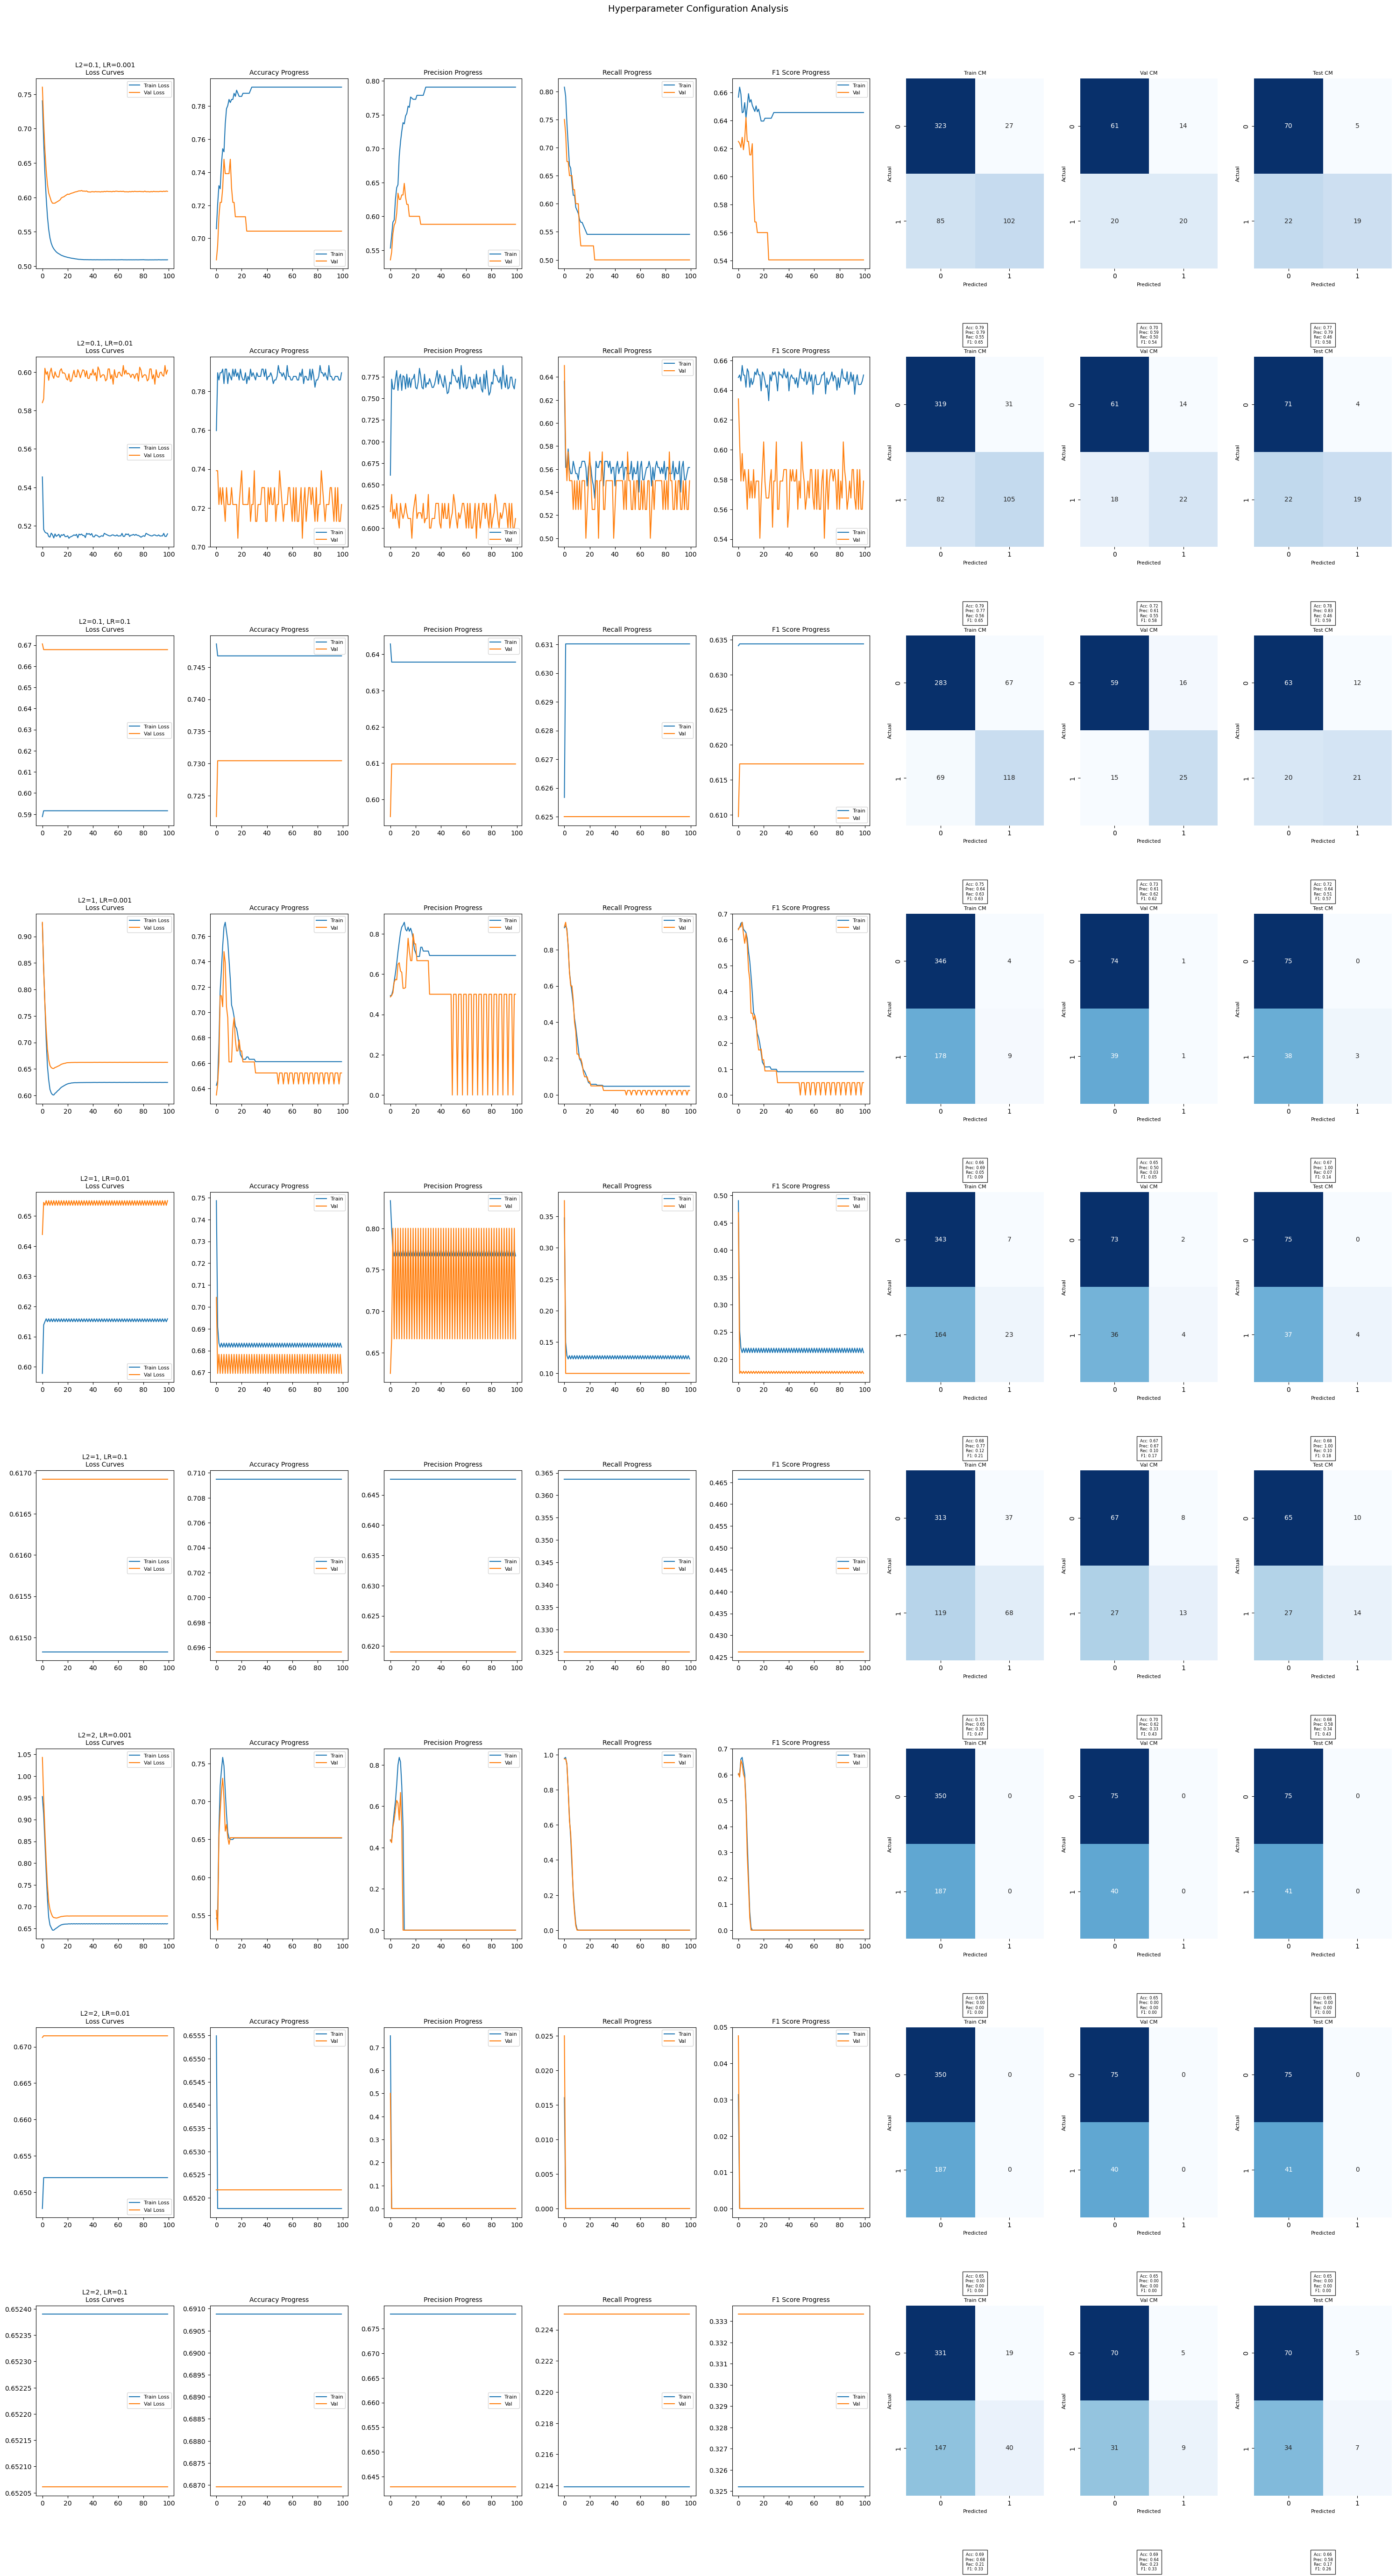

In [11]:
plot_hyperparameter_analysis_grid_8_subplots(results, X_train, X_val, X_test, y_train, y_val, y_test, "SVM_GRID.png")

### Observations and Analysis:
- For large L2 regularization values (λ = 1, 2), the model tends to be highly biased toward the majority class.
- Since we are using Stochastic Gradient Descent (SGD), we observe oscillations in the loss for lower learning rates.
- A smaller learning rate (e.g., 0.001) leads to a gradual reduction in the loss.
- When the learning rate is too large, the model overshoots the optimal solution, causing instability.
- Metrics like recall, F1 score and precision are more informative in this case than accuracy .
- The classifier's performance is significantly affected by class imbalance in the data.
- As the regularization parameter (λ) increases, the effect of the L2 regularization term (|w|₂) becomes more prominent, leading to predictions that are heavily skewed toward the majority class.

In [12]:
class SVM:
    def __init__(self, X, y, C=0.1, kernel='linear', length_scale=10, degree=3, coef0_poly_ker =1, tol=1e-5):
        """
        X: np.ndarray
        y: np.ndarray
        C: float
        kernel: str
        length_scale: float
        degree: int
        coef0_poly_ker: float
        tol: float
        """
        self.X = X
        self.y = y
        self.C = C
        self.tol = tol
        self.length_scale = length_scale # Only used for RBF kernel
        self.degree = degree # Only used for polynomial kernel
        self.coef0_poly_ker = coef0_poly_ker # Only used for polynomial kernel
        # Select the kernel function
        if kernel == 'linear':
            self.kernel = self.linear_kernel
        elif kernel == 'rbf':
            self.kernel = self.rbf_kernel
        elif kernel == 'poly':
            self.kernel = self.polynomial_kernel
        else:
            raise ValueError("Kernel not supported")
        self.alpha = np.zeros(X.shape[0])
        self.b = 0.0
        self.K = self.compute_kernel_matrix()
        self.w = None  # Only used for linear kernel predictions


    def linear_kernel(self, x1, x2):
        return np.dot(x1, x2)

    def rbf_kernel(self, x1, x2):
        return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * self.length_scale**2))

    def polynomial_kernel(self, x1, x2):
        return (np.dot(x1, x2) + self.coef0_poly_ker) ** self.degree

    def compute_kernel_matrix(self):
        """
        Compute the kernel matrix
        return: np.ndarray"""
        n_samples = self.X.shape[0]
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(self.X[i], self.X[j])
        return K

    def get_w(self):
        # Only applicable for linear kernels
        return np.dot(self.alpha * self.y, self.X)

    def predict(self, X):
        """
        Predict the target variable
        arg:
        X: np.ndarray
        return: np.ndarray
        """
        if self.w is None and hasattr(self, 'kernel') and self.kernel == self.linear_kernel:
            self.w = self.get_w()
            decision = np.dot(X, self.w) + self.b
        else:
            # Use kernel expansion: f(x) = sum_i (alpha_i * y_i * K(x_i, x)) + b
            decision = np.array([np.sum(self.alpha * self.y * 
                              np.array([self.kernel(x_i, x) for x_i in self.X])) + self.b 
                              for x in X])
        return np.where(decision >= 0, 1, -1)

    def update_b(self):
        # recompute b using the support vectors
        indices = np.where((self.alpha > 0) & (self.alpha < self.C))[0]
        if len(indices) == 0:
            return self.b
        b_sum = 0.0
        for i in indices:
            b_sum += self.y[i] - np.sum(self.alpha * self.y * self.K[:, i])
        return b_sum / len(indices)


class SMO:
    def __init__(self, svm, max_passes=5, max_iters=1000):
        """
        svm: An instance of the SVM class.
        max_passes: Maximum number of passes over the dataset with no changes before stopping.
        """
        self.svm = svm
        self.max_passes = max_passes
        self.metrics = []
        self.max_iters = max_iters 

    def calculate_E(self, i):
        # f(x_i) = sum_j alpha_j * y_j * K[j, i] + b
        f_xi = np.sum(self.svm.alpha * self.svm.y * self.svm.K[:, i]) + self.svm.b
        return f_xi - self.svm.y[i]

    def calculate_LH(self, alpha_i, alpha_j, y_i, y_j):
        if y_i != y_j:
            return max(0, alpha_j - alpha_i), min(self.svm.C, self.svm.C - alpha_i + alpha_j) # L, H
        else:
            return max(0, alpha_i + alpha_j - self.svm.C), min(self.svm.C, alpha_i + alpha_j) # L, H

    def calculate_eta(self, i, j):
        return self.svm.K[i, i] + self.svm.K[j, j] - 2 * self.svm.K[i, j]

    def take_step(self, i, j):
        if i == j:
            return False

        alpha_i_old = self.svm.alpha[i]
        alpha_j_old = self.svm.alpha[j]
        y_i = self.svm.y[i]
        y_j = self.svm.y[j]

        E_i = self.calculate_E(i)
        E_j = self.calculate_E(j)

        L, H = self.calculate_LH(alpha_i_old, alpha_j_old, y_i, y_j)
        if L == H:
            return False

        eta = self.calculate_eta(i, j)
        if eta <= 0:
            return False

        # Compute new alpha_j and clip it within [L, H]
        alpha_j_new = alpha_j_old + y_j * (E_i - E_j) / eta
        alpha_j_new = np.clip(alpha_j_new, L, H)

        # Check if the change in alpha is significant
        if abs(alpha_j_new - alpha_j_old) < self.svm.tol * (alpha_j_new + alpha_j_old + self.svm.tol):
            return False

        alpha_i_new = alpha_i_old + y_i * y_j * (alpha_j_old - alpha_j_new)

        b1 = (self.svm.b - E_i
              - y_i * (alpha_i_new - alpha_i_old) * self.svm.K[i, i]
              - y_j * (alpha_j_new - alpha_j_old) * self.svm.K[i, j]) 
        b2 = (self.svm.b - E_j
              - y_i * (alpha_i_new - alpha_i_old) * self.svm.K[i, j]
              - y_j * (alpha_j_new - alpha_j_old) * self.svm.K[j, j])

        # Set the new threshold b
        if 0 < alpha_i_new < self.svm.C:
            b_new = b1
        elif 0 < alpha_j_new < self.svm.C:
            b_new = b2
        else:
            b_new = (b1 + b2) / 2.0

        # Update the model parameters in the SVM instance
        self.svm.alpha[i] = alpha_i_new
        self.svm.alpha[j] = alpha_j_new
        self.svm.b = b_new

        return True

    def optimize(self):

        passes = 0
        n_samples = self.svm.X.shape[0]
        iters = 0
        while iters < self.max_iters and  passes < self.max_passes:
            num_changed = 0
            for i in range(n_samples):
                E_i = self.calculate_E(i)
                # Check if example i violates the KKT conditions
                if ((self.svm.y[i] * E_i < -self.svm.tol and self.svm.alpha[i] < self.svm.C) or
                    (self.svm.y[i] * E_i > self.svm.tol and self.svm.alpha[i] > 0)):
                    # Select j randomly (j ≠ i)
                    j_candidates = [j for j in range(n_samples) if j != i]
                    j = np.random.choice(j_candidates)
                    if self.take_step(i, j):
                        num_changed += 1
                        
            y_pred = self.svm.predict(self.svm.X)
            accuracy = accuracy_score(self.svm.y, y_pred)
            precision = precision_score(self.svm.y, y_pred)
            recall = recall_score(self.svm.y, y_pred)
            f1 = f1_score(self.svm.y, y_pred)
            
            self.metrics.append({'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})
            
            # If no alphas were changed, increase the pass count; otherwise, reset it
            if num_changed == 0:
                passes += 1
            else:
                passes = 0
            iters += 1

        # update the weight vector if using a linear kernel
        if self.svm.kernel == self.svm.linear_kernel:
            self.svm.w = self.svm.get_w()



Accuracy: 0.7327586206896551, Precision: 0.7083333333333334, Recall: 0.4146341463414634, F1: 0.5230769230769231


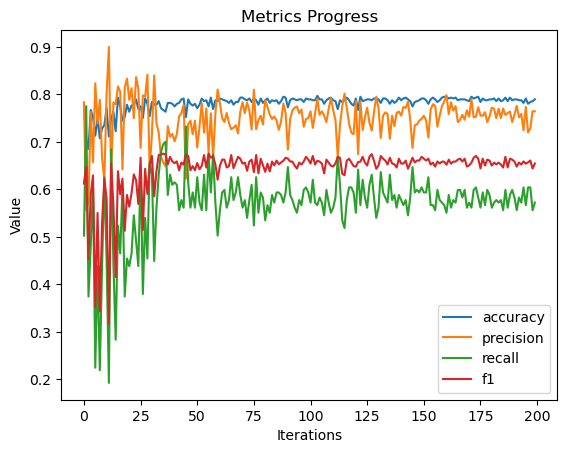

In [13]:
svm_dual_model = SVM(X_train, y_train, C=1.0, kernel='linear')
smo = SMO(svm_dual_model, max_passes=5, max_iters =200)
smo.optimize()

y_pred_test = svm_dual_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


# Plot the metrics
metrics_df = pd.DataFrame(smo.metrics)
metrics_df.plot()
plt.title('Metrics Progress')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.show()

Accuracy: 0.7413793103448276, Precision: 0.72, Recall: 0.43902439024390244, F1: 0.5454545454545454


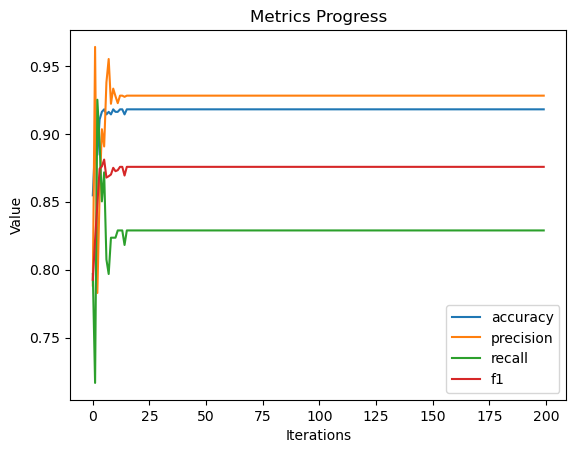

In [14]:
svm_dual_model = SVM(X_train, y_train, C=1.0, kernel='rbf', length_scale=1)
smo = SMO(svm_dual_model, max_passes=5, max_iters =200)
smo.optimize()

y_pred_test = svm_dual_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


# Plot the metrics
metrics_df = pd.DataFrame(smo.metrics)
metrics_df.plot()
plt.title('Metrics Progress')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.show()

Accuracy: 0.7758620689655172, Precision: 0.8260869565217391, Recall: 0.4634146341463415, F1: 0.59375


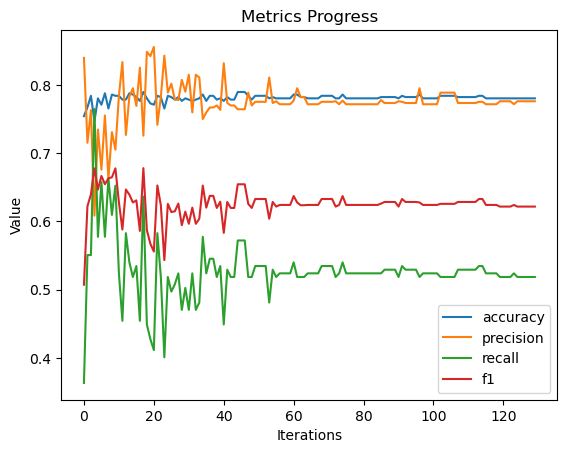

In [15]:
svm_dual_model = SVM(X_train, y_train, C=1, kernel='rbf', length_scale=10)
smo = SMO(svm_dual_model, max_passes=5, max_iters =200)
smo.optimize()

y_pred_test = svm_dual_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


# Plot the metrics
metrics_df = pd.DataFrame(smo.metrics)
metrics_df.plot()
plt.title('Metrics Progress')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.show()

Accuracy: 0.7758620689655172, Precision: 0.7777777777777778, Recall: 0.5121951219512195, F1: 0.6176470588235294


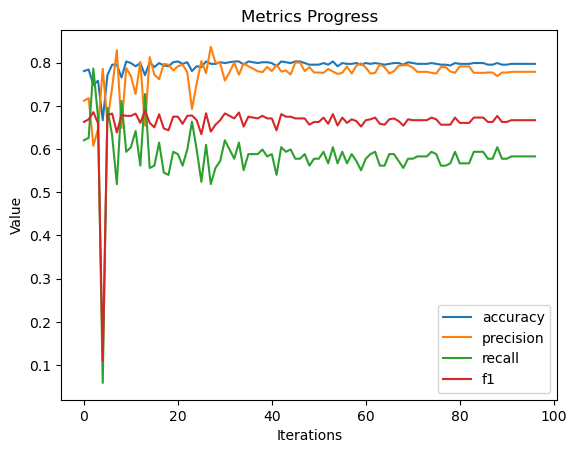

In [16]:
svm_dual_model = SVM(X_train, y_train, C=1, kernel='rbf', length_scale=5)
smo = SMO(svm_dual_model, max_passes=5, max_iters =200)
smo.optimize()

y_pred_test = svm_dual_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


# Plot the metrics
metrics_df = pd.DataFrame(smo.metrics)
metrics_df.plot()
plt.title('Metrics Progress')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.show()

Accuracy: 0.75, Precision: 1.0, Recall: 0.2926829268292683, F1: 0.4528301886792453


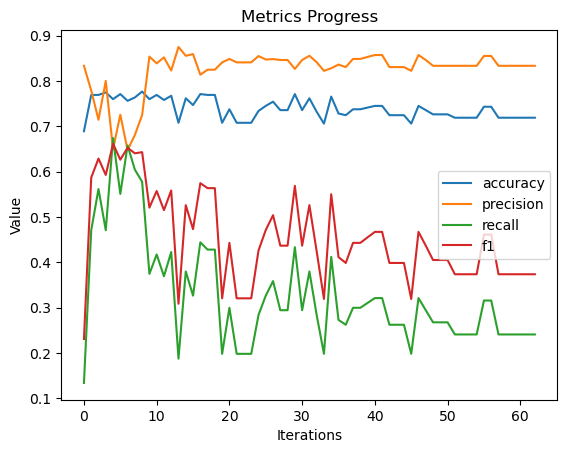

In [17]:
svm_dual_model = SVM(X_train, y_train, C=0.1, kernel='rbf', length_scale=5)
smo = SMO(svm_dual_model, max_passes=5, max_iters =200)
smo.optimize()

y_pred_test = svm_dual_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


# Plot the metrics
metrics_df = pd.DataFrame(smo.metrics)
metrics_df.plot()
plt.title('Metrics Progress')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.show()

Accuracy: 0.75, Precision: 0.7307692307692307, Recall: 0.4634146341463415, F1: 0.5671641791044776


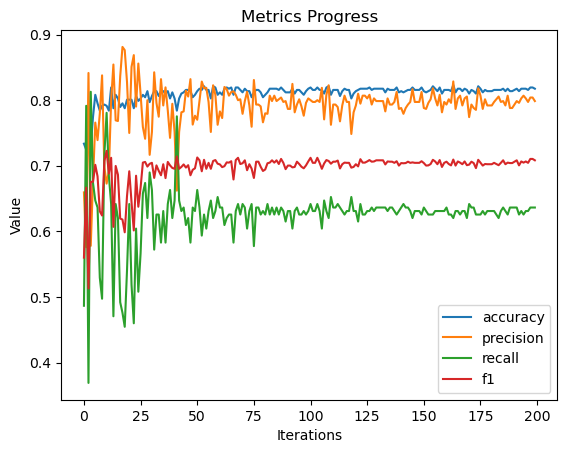

In [18]:
svm_dual_model = SVM(X_train, y_train, C=10, kernel='rbf', length_scale=5)
smo = SMO(svm_dual_model, max_passes=5, max_iters =200)
smo.optimize()

y_pred_test = svm_dual_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


# Plot the metrics
metrics_df = pd.DataFrame(smo.metrics)
metrics_df.plot()
plt.title('Metrics Progress')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.show()

In [19]:
def plot_smo_kernel_hyperparam_variations(kernels, hyperparam_values, X_train, y_train,X_val,y_val, X_test, y_test, C_default=0.01, degree_default=2, coef0_poly_default=1, filename="image.png"):
    """
    plot the SMO metrics and confusion matrices for different kernels and hyperparameters
    args:
    kernels: list of str
    hyperparam_values: dict
    X_train: np.ndarray
    y_train: np.ndarray
    X_val: np.ndarray
    y_val: np.ndarray
    X_test: np.ndarray
    y_test: np.ndarray
    C_default: float
    degree_default: int
    coef0_poly_default: float
    C is the only hyperparameter we are varying for all kernels
    """
    for kernel in kernels:
        values = hyperparam_values[kernel]
        n = len(values)
        fig, axes = plt.subplots(7, n, figsize=(n*5, 30))
        for i, hp in enumerate(values):
            if kernel == 'linear':
                svm_model = SVM(X_train, y_train, C=hp, kernel=kernel)
            elif kernel == 'rbf':
                svm_model = SVM(X_train, y_train, C=hp, kernel=kernel, length_scale = 10)
            elif kernel == 'poly':
                svm_model = SVM(X_train, y_train, C=hp, kernel=kernel, degree=degree_default, coef0_poly_ker=coef0_poly_default)
            else:
                continue
            smo = SMO(svm_model, max_passes=5, max_iters =200)
            smo.optimize()
            metrics_df = pd.DataFrame(smo.metrics)
            axes[0, i].plot(metrics_df['accuracy'])
            axes[0, i].set_title(f'{kernel} (C={hp}) - Accuracy')
            axes[0, i].set_xlabel('Iterations')
            axes[0, i].set_ylabel('Accuracy')
            axes[1, i].plot(metrics_df['precision'], color='orange')
            axes[1, i].set_title(f'{kernel} (C={hp}) - Precision')
            axes[1, i].set_xlabel('Iterations')
            axes[1, i].set_ylabel('Precision')
            axes[2, i].plot(metrics_df['recall'], color='green')
            axes[2, i].set_title(f'{kernel} (C={hp}) - Recall')
            axes[2, i].set_xlabel('Iterations')
            axes[2, i].set_ylabel('Recall')
            axes[3, i].plot(metrics_df['f1'], color='red')
            axes[3, i].set_title(f'{kernel} (C={hp}) - F1 Score')
            axes[3, i].set_xlabel('Iterations')
            axes[3, i].set_ylabel('F1 Score')
            
            y_pred_test = svm_model.predict(X_test)
            cm_test = confusion_matrix(y_test, y_pred_test)
            sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[4, i], cbar=False)
            axes[4, i].set_title(f'{kernel} (C={hp}) - Test CM')
            axes[4, i].set_xlabel('Predicted')
            axes[4, i].set_ylabel('Actual')
            
            y_pred_val = svm_model.predict(X_val)
            cm_val = confusion_matrix(y_val, y_pred_val)
            sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[5, i], cbar=False)
            axes[5, i].set_title(f'{kernel} (C={hp}) - Validation CM')
            axes[5, i].set_xlabel('Predicted')
            axes[5, i].set_ylabel('Actual')
            
            y_pred_train = svm_model.predict(X_train)
            cm_val = confusion_matrix(y_train, y_pred_train)
            sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[6, i], cbar=False)
            axes[6, i].set_title(f'{kernel} (C={hp}) - Train CM')
            axes[6, i].set_xlabel('Predicted')
            axes[6, i].set_ylabel('Actual')
            
        fig.suptitle(f"SMO Metrics and Confusion matrix")
        fig.suptitle(f"SMO Metrics and Confusion Matrices for {kernel} Kernel", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


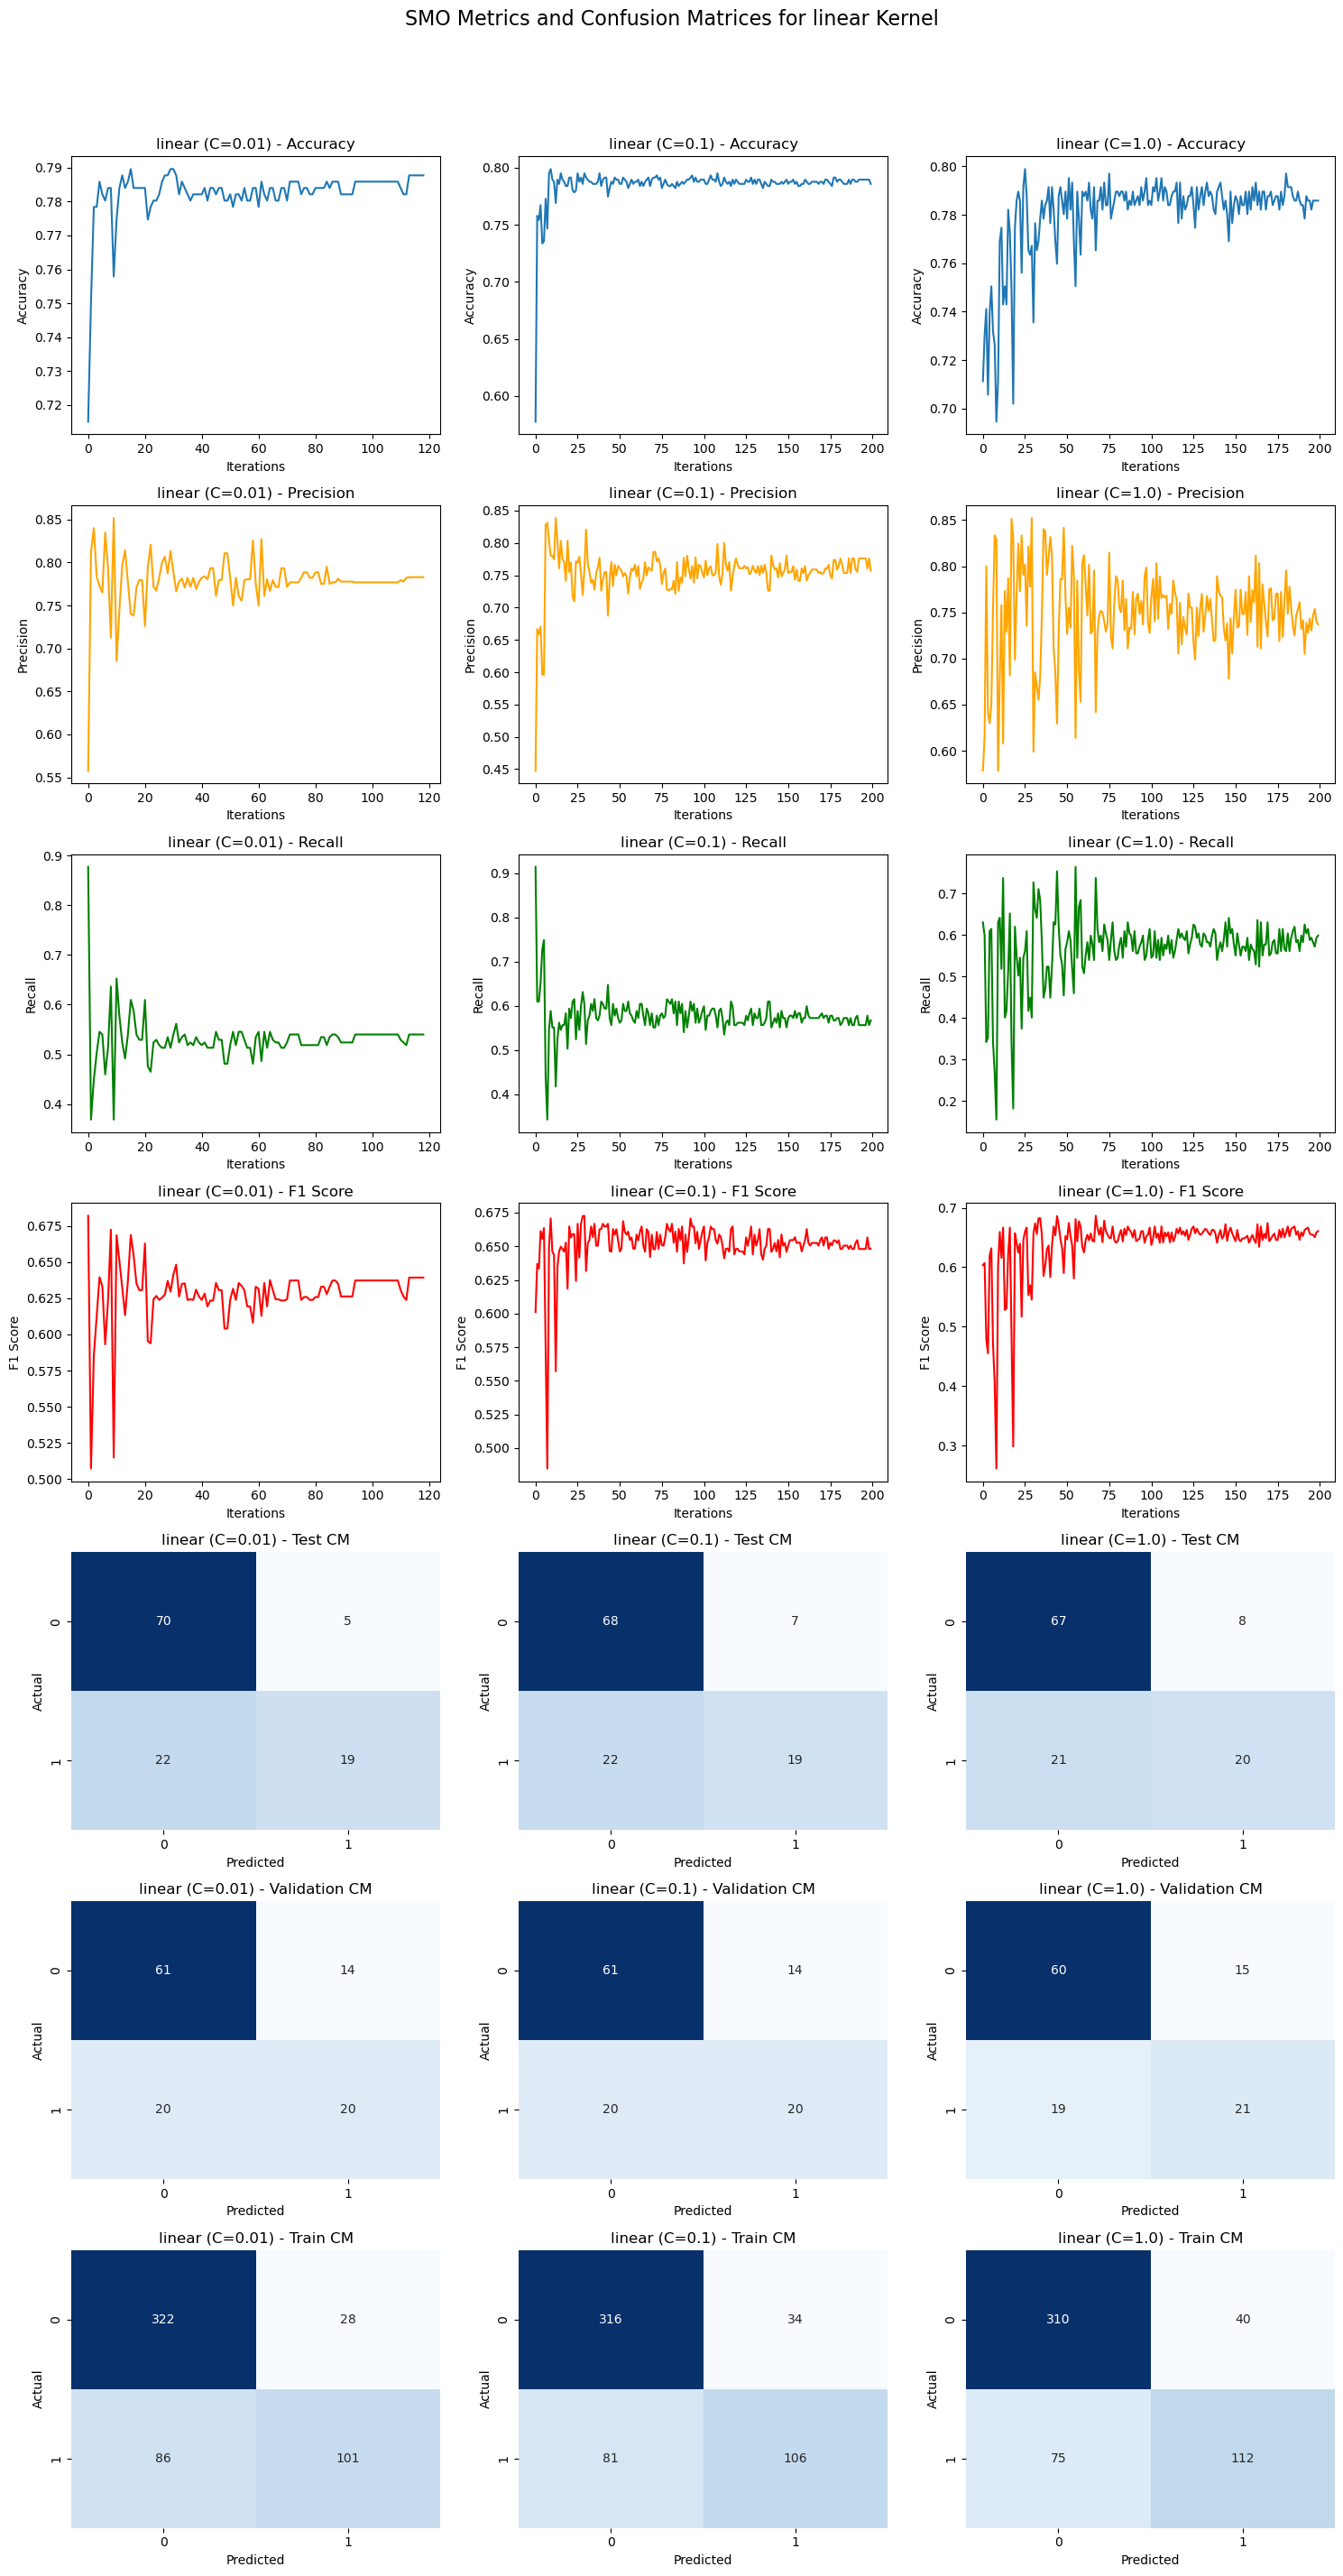

In [20]:
# for the linear kernel
kernels = ['linear']
hyperparam_values = {
    'linear': [0.01, 0.1, 1.0],  
    'rbf': [0.1, 1, 10],      
    'poly': [0.001, 0.01, 0.01]             
}


plot_smo_kernel_hyperparam_variations(kernels, hyperparam_values, X_train, y_train, X_val, y_val, X_test, y_test, filename = "linear_kernel.png")


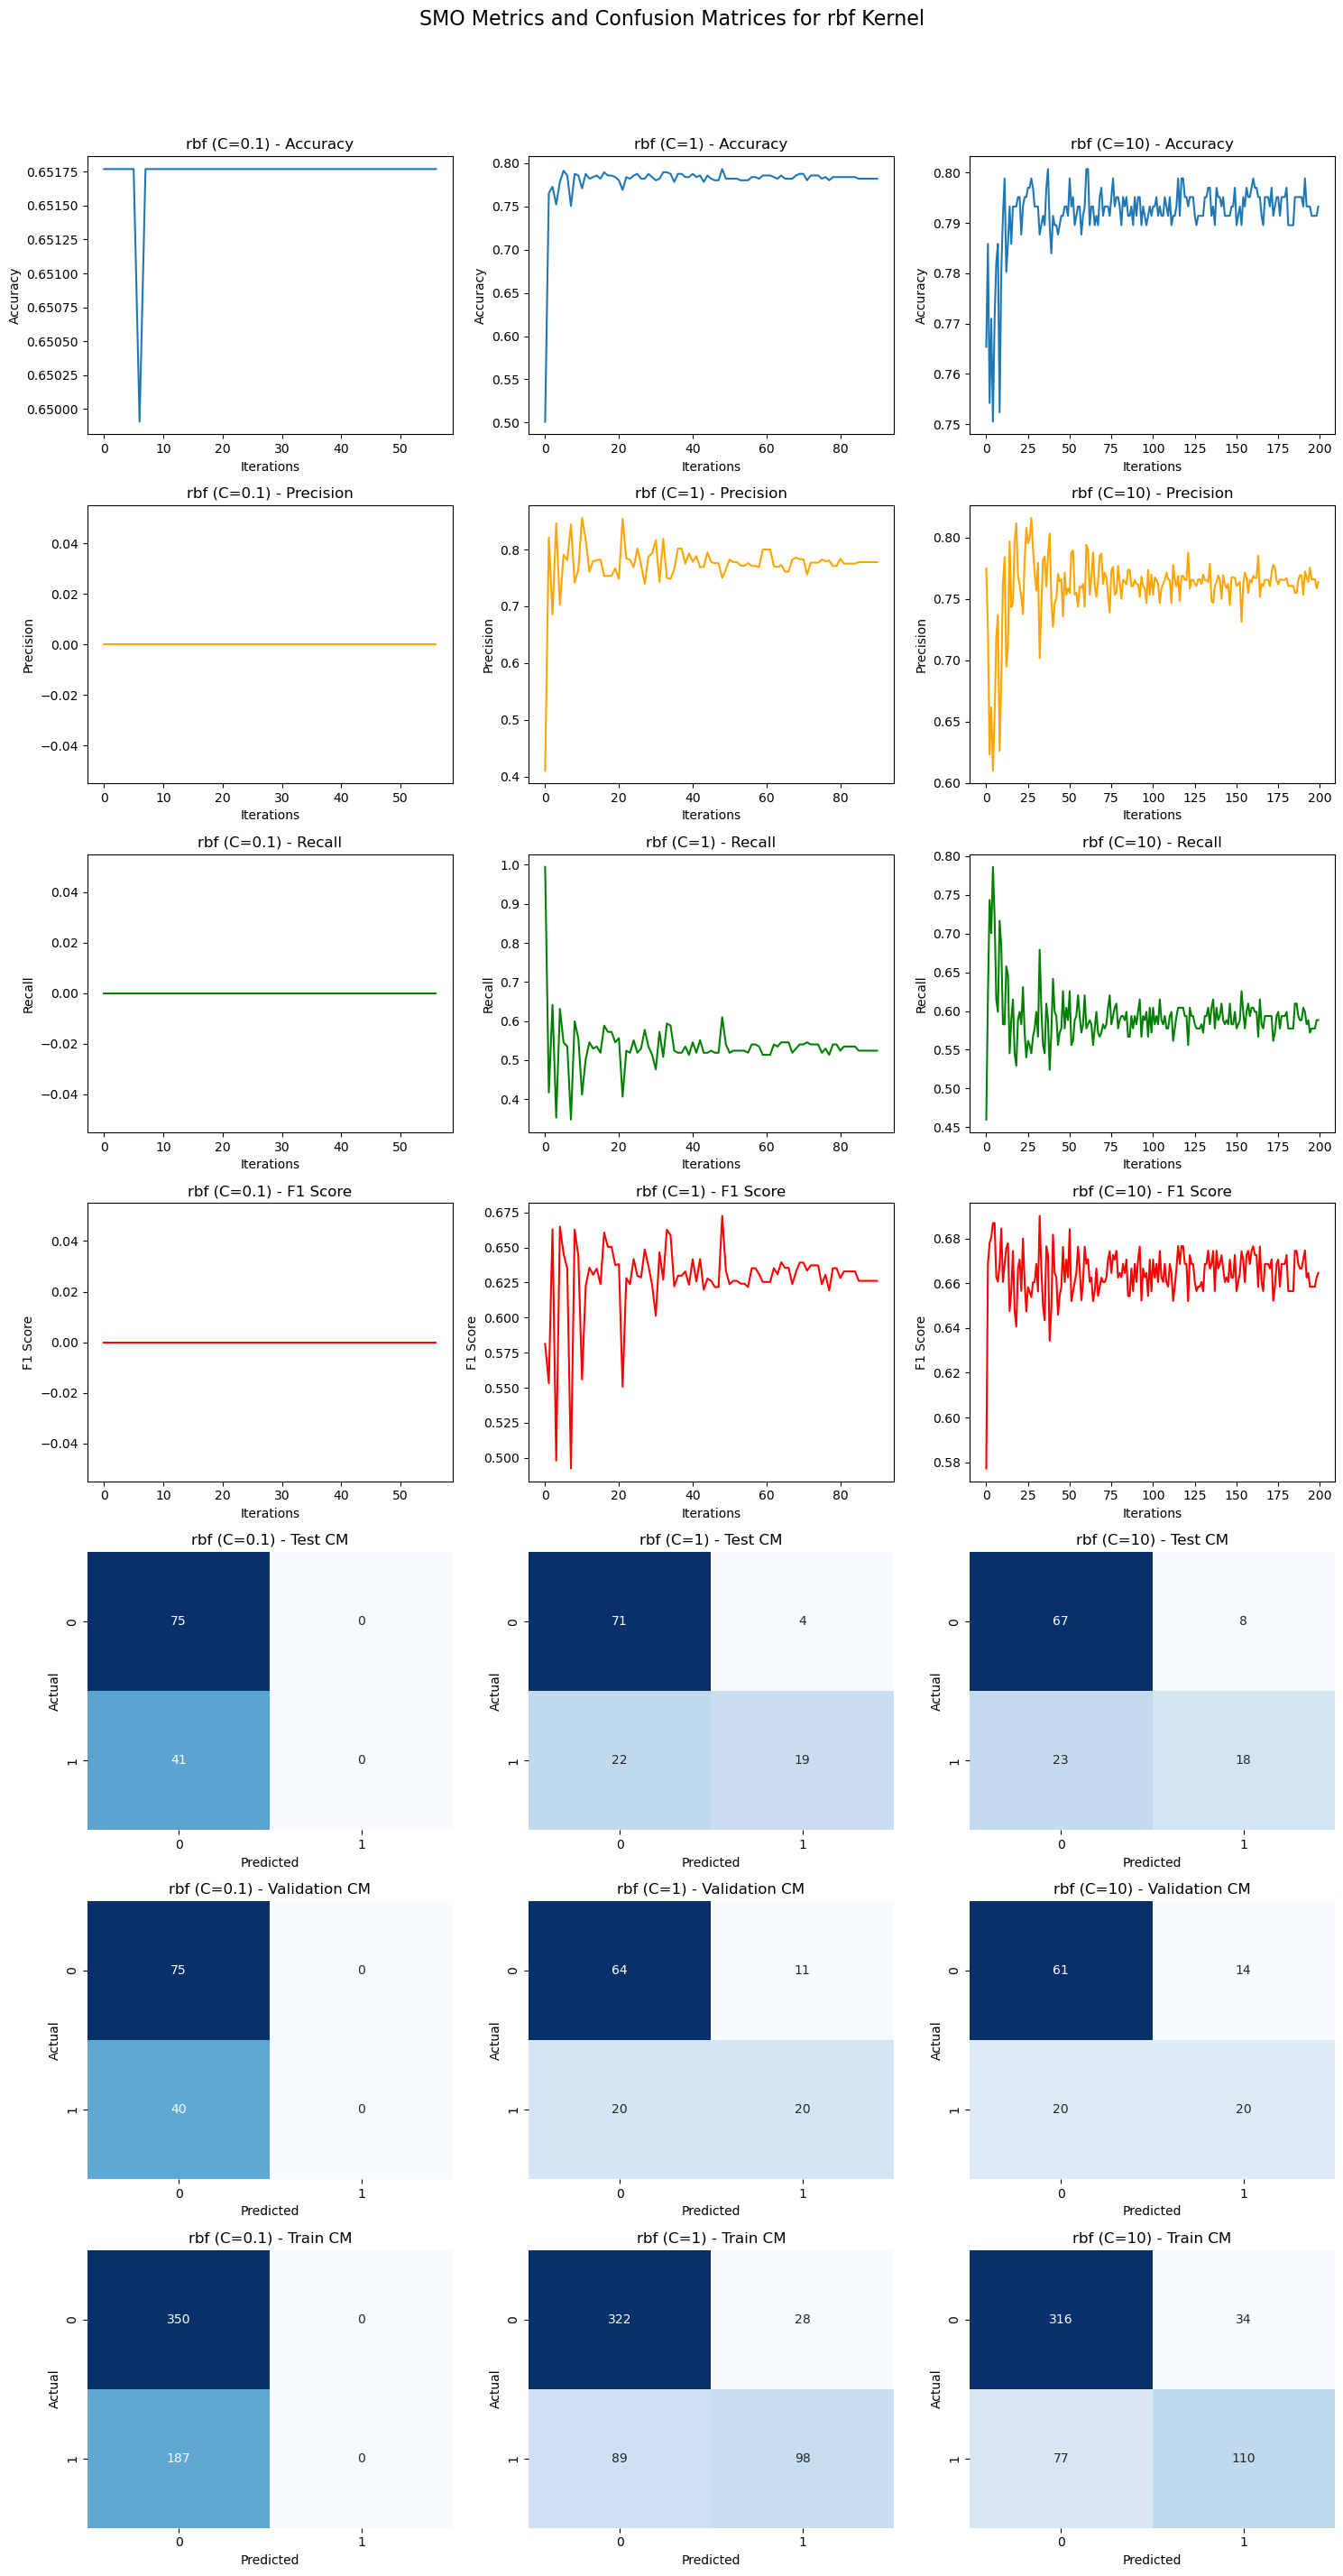

In [21]:
# for the rbf kernel
kernels = ['rbf']
hyperparam_values = {
    'linear': [0.01, 0.1, 1.0],  
    'rbf': [0.1, 1, 10],      
    'poly': [0.001, 0.01, 0.01]    
}

plot_smo_kernel_hyperparam_variations(kernels, hyperparam_values, X_train, y_train,X_val, y_val, X_test, y_test, filename = "rbf_kernel.png" )


Accuracy: 0.75, Precision: 0.8333333333333334, Recall: 0.36585365853658536, F1: 0.5084745762711864


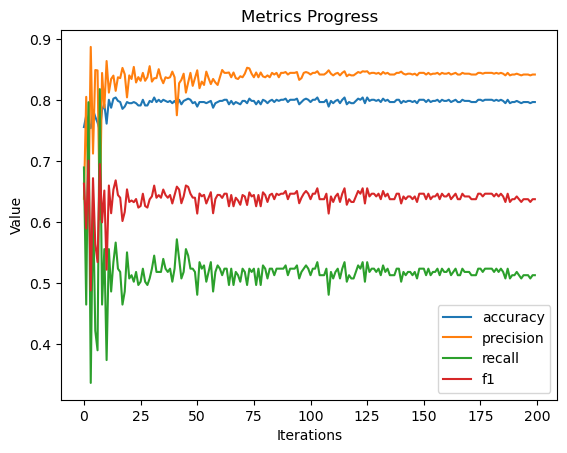

In [22]:
svm_dual_model = SVM(X_train, y_train, C=0.01, kernel='poly', degree=2, coef0_poly_ker=1)
smo = SMO(svm_dual_model, max_passes=5, max_iters =200)
smo.optimize()

y_pred_test = svm_dual_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


# Plot the metrics
metrics_df = pd.DataFrame(smo.metrics)
metrics_df.plot()
plt.title('Metrics Progress')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.show()

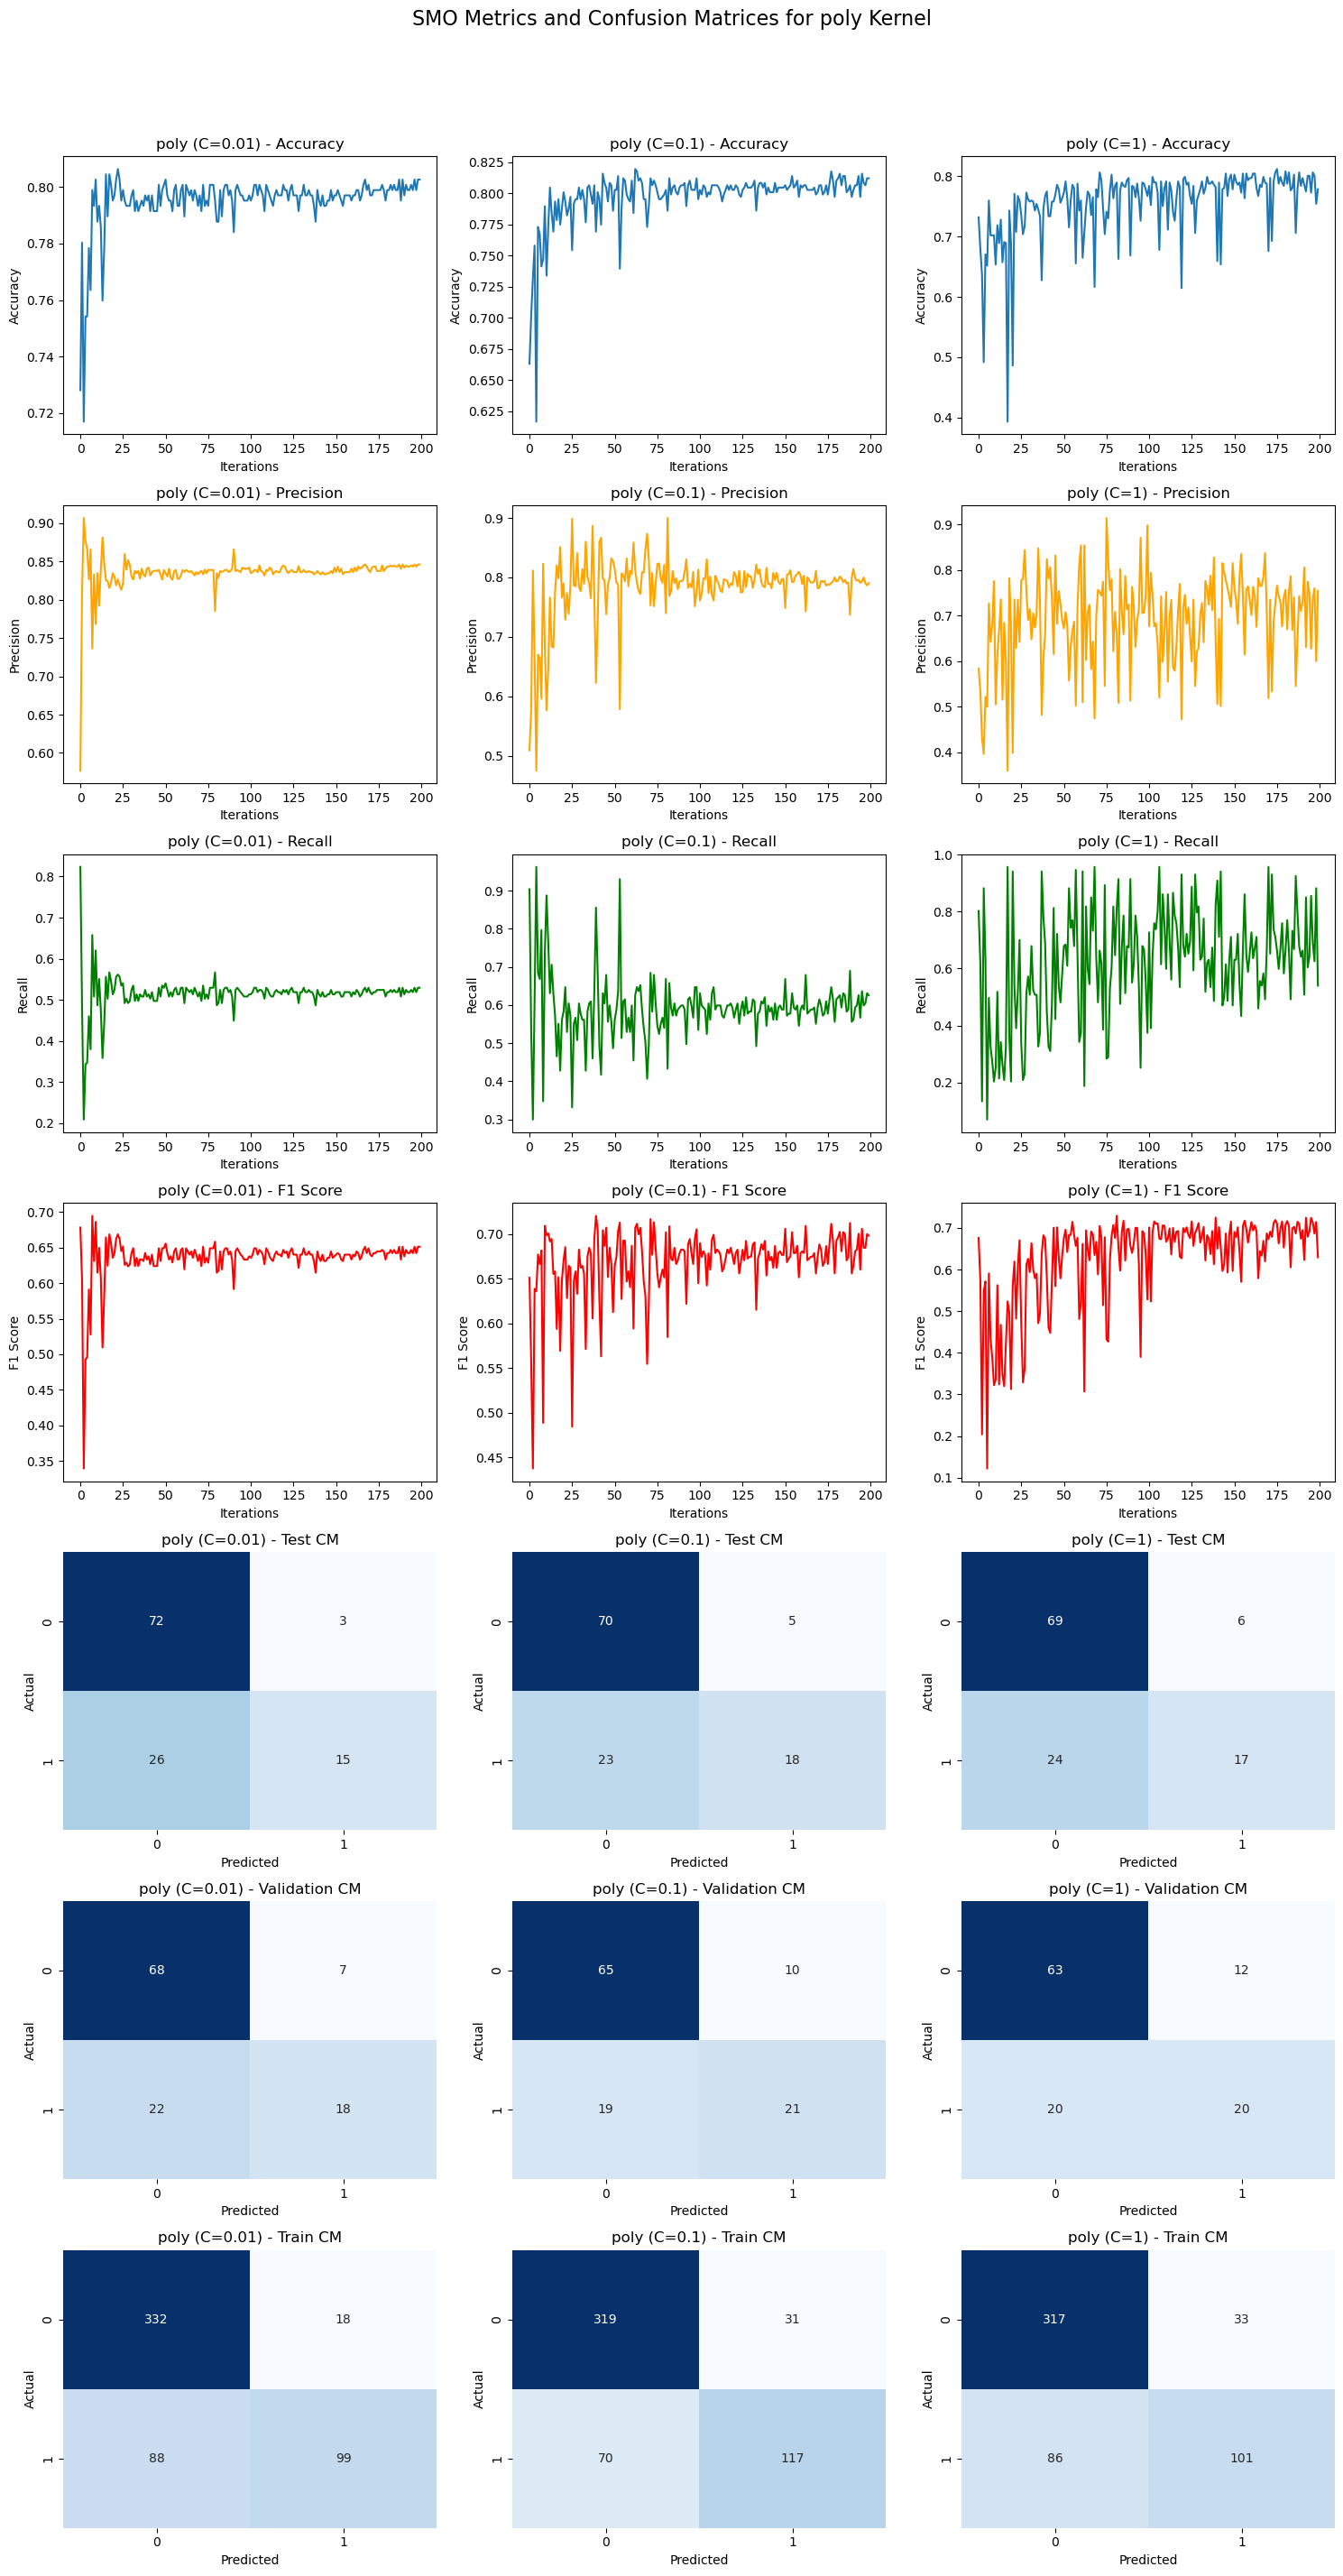

In [23]:
# for the polynomial kernel
kernels = ['poly']
hyperparam_values = {
    'linear': [0.01, 0.1, 1.0],  
    'rbf': [0.1, 1, 10],   
    'poly': [0.01, 0.1, 1]             
}

plot_smo_kernel_hyperparam_variations(kernels, hyperparam_values, X_train, y_train,X_val, y_val, X_test, y_test, filename = "poly_kernel.png" )


### Observations and Analysis:
- A low \(C\) value promotes a larger margin but allows for more misclassifications.
- A high \(C\) value leads to a narrower margin, enabling the model to fit the training data more closely, which may result in overfitting.
- Metrics such as precision, recall, and F1 score provide a more informative evaluation than accuracy alone.
- Employing complex kernels (e.g., RBF) enables the model to capture non-linear boundaries, potentially fitting the training data perfectly but increasing the risk of overfitting.
- The linear kernel is computationally efficient.
- In high-dimensional data, a low \(C\) value can result in frequent misclassifications, often biasing predictions toward the majority class.
- A smaller length scale in an RBF kernel produces a more flexible and intricate decision boundary.
- A larger length scale results in smoother decision boundaries that capture broader trends, reducing model complexity.
- Higher degrees Polynomial Kernel can capture more complex patterns but may overfit
- Lower degrees Polynomial Kernel can behave more like linear kernels

# **Problem Statement: 2**

## Clustering Analysis on MNIST Dataset

Implement and analyze clustering algorithms on the MNIST handwritten digits dataset.

## Required Implementations
 1. K-means Clustering
 2. Gaussian Mixture Models (GMM)

## Dataset Description
- MNIST dataset: 70,000 grayscale images of handwritten digits (0-9)
- Image size: 28x28 pixels (784 dimensions)
- Training set: 60,000 images
- Test set: 10,000 images

In [24]:
# Script to download MNIST dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X,y = mnist.data, mnist.target

# test-train split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

## Understanding Your Data
As data scientists, our first crucial step should be data visualization and exploration. Before diving into complex algorithms or models, we need to thoroughly understand the patterns, distributions, and characteristics of our dataset.

We've provided a script that creates an organized grid of images from your dataset. This visualization tool will help you:
1. Inspect individual samples
2. Compare images across different classes
3. Identify any potential data inconsistencies
4. Make informed decisions about preprocessing steps

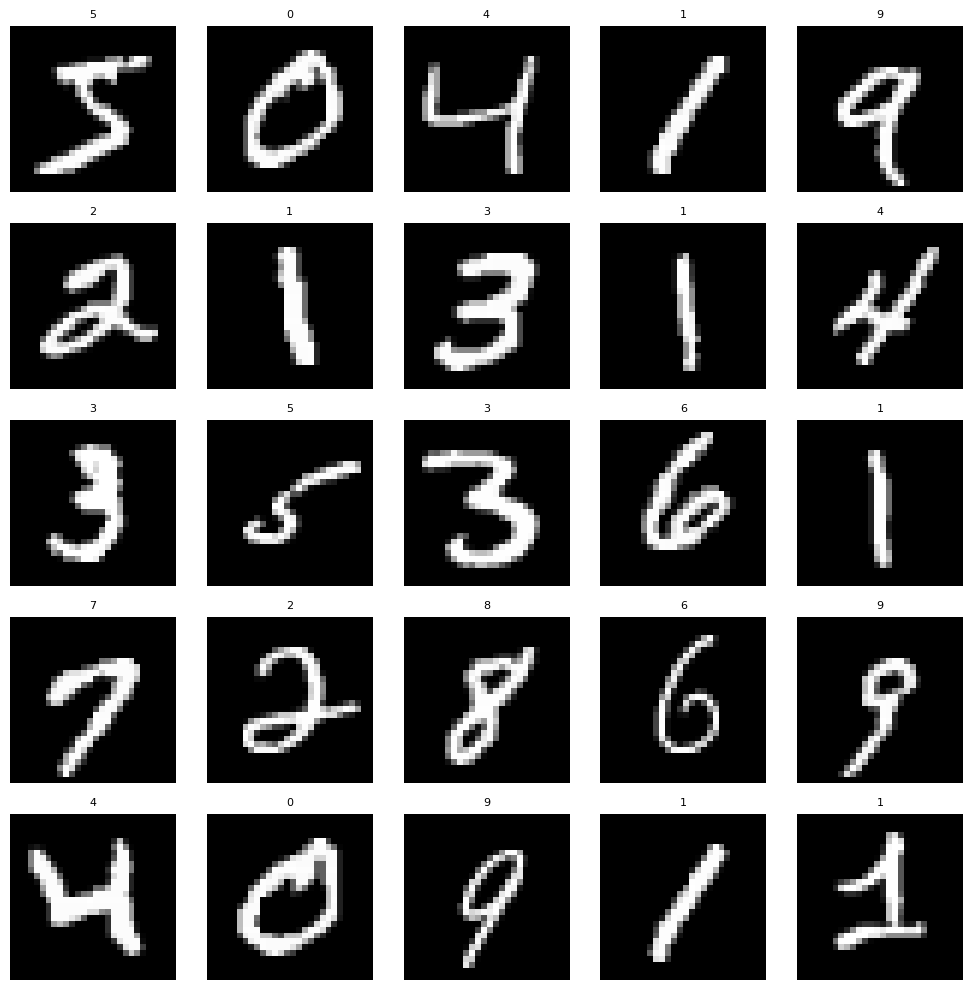

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def plot_image_grid(images: np.ndarray, labels: np.ndarray,
                    rows: int = 5, cols: int = 5) -> None:
  """
  Plots a grid of images with corresponding labels.

    Args:
        images (np.ndarray): A NumPy array of shape (N, H, W) containing grayscale images.
        labels (np.ndarray): A NumPy array of shape (N,) containing labels for the images.
        rows (int, optional): Number of rows in the grid. Default is 5.
        cols (int, optional): Number of columns in the grid. Default is 5.
  """
  fig, axes = plt.subplots(rows, cols, figsize=(10,10))
  axes = axes.flatten()

  for i in range(rows * cols):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"{y[i]}", fontsize=8)

  plt.tight_layout()
  plt.show()
def kmeans_cluster(max_iters: int = 100, tol: float = 1e-4) -> tuple[np.ndarray, np.ndarray]:

    # TODO: Implement K-means clustering algorithm
    pass 

X_train_reshaped = X_train.reshape(-1, 28, 28)
plot_image_grid(X_train_reshaped, y)

## Dimensionality Reduction through Principal Componetn Analysis (PCA)

### Why PCA for MNIST Clustering

   - Converts 784 dimensions (28x28 pixels) to ~40-50 components
   - Retains 95% of variance
   - Makes clustering computationally feasible

In [26]:
from sklearn.decomposition import PCA

# You can use sklearn's api to perform PCA
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)

# normalize the data
mu = x_train.mean()
sigma = x_train.std()
x_train = (x_train - mu) / sigma
x_test = (x_test - mu) / sigma

pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



In [27]:
X_train_pca

array([[ 123.93258866,  312.67426202,   24.51405176, ..., -200.21912838,
        -157.66054593, -359.74286053],
       [1011.71837587,  294.85703827, -596.33956104, ...,   16.77354423,
         -73.67048975,   42.21977317],
       [ -51.84960805, -392.17315286,  188.50974943, ...,  185.70013244,
         -68.69775364,    3.72693867],
       ...,
       [-178.0534496 , -160.07821109,  257.61308227, ...,   14.88903039,
         105.91364819, -237.1729043 ],
       [ 130.60607208,    5.59193642, -513.85867395, ...,   49.45564616,
          85.03608406,   37.9060578 ],
       [-173.43595244,   24.71880226, -556.01889393, ...,  -90.86119595,
         -23.9952507 ,  147.31271817]], shape=(60000, 40))

### 1. K-means Clustering
Implement K-means from scratch with the following requirements:
- Use NumPy for all computations
- Initialize centroids using random selection
- Set k=10 (one for each digit)
- Include stopping criteria:
  * Maximum iterations
  * Convergence threshold
- Track and store:
  * Cluster assignments
  * Centroid positions
  * Iteration history

In [28]:
# Functional aproach (Recommended for beginners)
# If you want to follow OOP paradigm, you can create a class
# from scratch that has similar functionality

class Kmeans():
    """
    Implement K-means clustering algorithm from scratch using NumPy.

    Args:
        X: Input data array of shape (n_samples, n_features)
           Contains the data points to be clustered
        n_clusters: Number of clusters to form (default: 10)
        max_iters: Maximum number of iterations for convergence (default: 100)
        tol: Tolerance for declaring convergence (default: 1e-4)

    Returns:
        tuple containing:
            - centroids: Array of shape (n_clusters, n_features)
                        Final position of cluster centroids
            - labels: Array of shape (n_samples,)
                     Cluster labels for each data point

    Note:
        - Use only NumPy for computations

    Bonus:
        - Optimize distance calculations using broadcasting
        - Ensure numerical stability
    """
    def __init__(self, X, n_clusters=10, max_iters=100, tol=1e-4):
        self.X = X
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.n_samples, self.n_features = X.shape
        # Choose random centroids from the data
        self.centroids = X[np.random.choice(self.n_samples, self.n_clusters, replace=False)]   # shape (n_clusters, n_features)
        self.history = []  
        self.centroid_history = [ self.centroids.copy() ]
        self.old_labels = []
        self.labels = None
    
    def expectation(self):
        X_broadcasted = np.broadcast_to(self.X[:, None], (self.n_samples, self.n_clusters, self.n_features))
        broadcasted_centroids = np.broadcast_to(self.centroids, (self.n_samples, self.n_clusters, self.n_features)) 
        distance = np.sum((X_broadcasted - broadcasted_centroids) ** 2, axis=2)  # shape (n_samples, n_clusters)
        labels = np.argmin(distance, axis=1)  # shape (n_samples,)
        self.old_labels.append(labels.copy())
        return labels
    
    def maximization(self, labels):
        new_centroids = np.array([
        self.X[np.where(labels == k)].mean(axis=0) if np.any(labels == k) else self.centroids[k] 
            for k in range(self.n_clusters)
        ]) # shape (n_clusters, n_features)
        self.centroid_history.append(new_centroids.copy())
        return new_centroids        

    def fit(self):
        for _ in tqdm(range(self.max_iters)):
            labels = self.expectation()
            new_centroids = self.maximization(labels)
            loss = np.sum((self.X - self.centroids[labels])**2) 
            self.history.append(loss)
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                print("Model fitted")
                break
            self.centroids = new_centroids
        self.labels = labels
        return self.centroids, labels
    
    def predict(self, X=None):
        X = self.X if X is None else X
        if X.ndim != 2 or X.shape[1] != self.n_features:
            raise ValueError(f"X must be of shape (n_samples, {self.n_features})")
        X_expanded = X[:, np.newaxis, :]
        centroids_expanded = self.centroids[np.newaxis, :, :]
        distances = np.sum((X_expanded - centroids_expanded) ** 2, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels 
    

  0%|          | 0/100 [00:00<?, ?it/s]

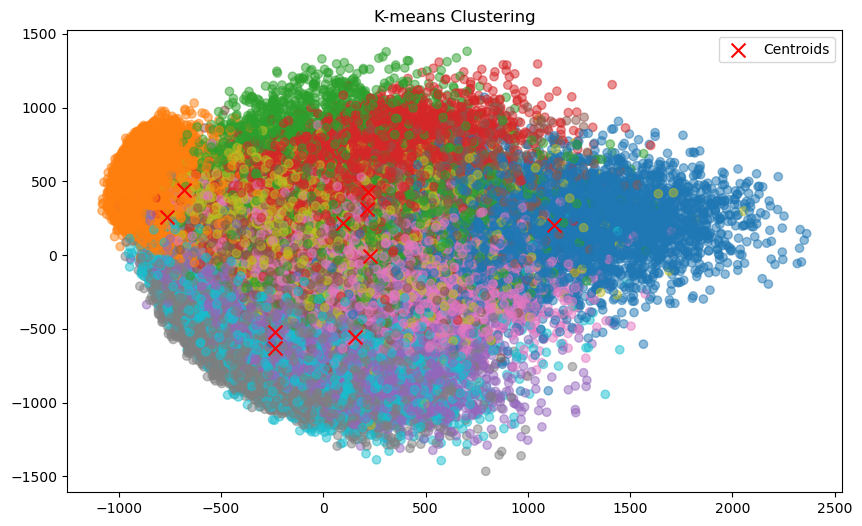

In [29]:
# Test the implementation
Kmeans_model = Kmeans(X_train_pca, n_clusters=10, max_iters=100, tol=1e-4)
centroids, labels = Kmeans_model.fit()

#plot the history of centroids
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_pca)
centroids_2d = pca_2d.transform(centroids)

plt.figure(figsize=(10, 6))

y_train_int = y_train.astype(int)
# Plot data points using y_train_int as color
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train_int, cmap='tab10', alpha=0.5)
# Plot centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='r', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

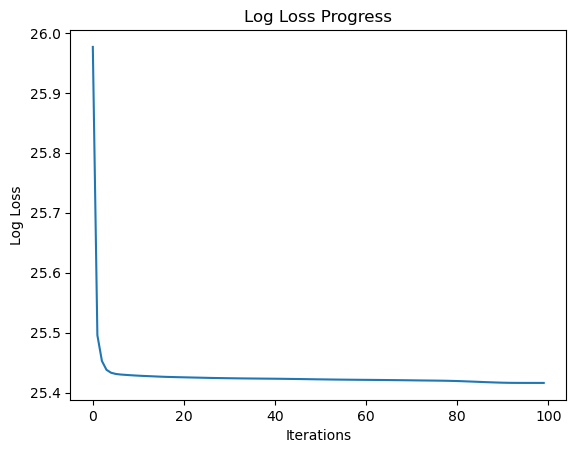

In [30]:
# plot log loss using the history
plt.plot(np.log(np.array(Kmeans_model.history)))
plt.title('Log Loss Progress')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.show()

## 2. Gaussian Mixture Models (GMM)
Implement GMM from scratch following the given details:

### Details

You can make use of the Generalised EM derivation done in class in order to solve for Gaussian Mixture Models. For ease of solving you can assume covariance matrix $\Sigma$ to be diagonal.

PDF of Multidimensional Gaussian being:
$$
f(x) = \sum_{k=1}^{K} \varphi_k \cdot \frac{1}{(2\varphi)^{D/2}|\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)
$$

We solve the above equation iteratively using EM to obtain estimations for $\varphi_k$, $\mu_k$ and $\Sigma_k$ for the number of mixtures assumed let's say $K$

### Expectation Step:
Compute the $\gamma(z_{ik})$ in the E-step:
$$
\gamma(z_{ik}) = \frac{\varphi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \varphi_j \cdot \mathcal{N}(x_i | \mu_j, \Sigma_j)}
$$

## Maximization Step:
Update the parameters in the M-step:

* **Update mixing proportions ($\varphi_k$):**
$$
\varphi_k^{(t+1)} = \frac{1}{N} \sum_{i=1}^{N} \gamma(z_{ik}^{(t)})
$$


* **Update means ($\mu_k$):**
$$
\mu_k^{(t+1)} = \frac{\sum_{i=1}^{N} \gamma(z_{ik}^{(t)}) \cdot x_i}{\sum_{i=1}^{N} \gamma(z_{ik}^{(t)})}
$$


* **Update covariances ($\Sigma_k$):**
$$
\Sigma_k^{(t+1)} = \frac{\sum_{i=1}^{N} \gamma(z_{ik}^{(t)}) \cdot (x_i - \mu_k^{(t+1)})(x_i - \mu_k^{(t+1)})^T}{\sum_{i=1}^{N} \gamma(z_{ik}^{(t)})}
$$


Here, $t$ is the iteration index, $N$ is the number of data points, $K$ is the number of components, $\gamma(z_{ik})$ is the responsibility, $\varphi_k^{(t+1)}$, $\mu_k^{(t+1)}$, and $\Sigma_k^{(t+1)}$ are the updated parameters.



In [31]:
class GMM():
    def __init__(self, X, n_components=10, max_iters=100, tol=1e-4, regularization=1e-6):
        self.X = X
        self.n_components = n_components
        self.max_iters = max_iters
        self.tol = tol
        self.n_samples, self.n_features = X.shape
        # Initialize parameters
        self.phi = np.full(n_components, 1 / n_components)  # shape (n_components,)
        self.mu = X[np.random.choice(self.n_samples, n_components, replace=False)]  # shape (n_components, n_features)
        self.initial_variance = np.var(X, axis=0)  # shape (n_features,)
        # Initialize sigma by replicating the variance for each component.
        self.sigma = np.tile(self.initial_variance, (n_components, 1))  # shape (n_components, n_features)
        
        self.history = []
        self.responsibilities = None
        self.regularization = regularization

    def log_gaussian_likelihood(self, i=None, X=None):
        """
        Compute the log-likelihood for each component for a single data point or the whole dataset.
        """
        if X is not None:
            if i is not None:
                X = X[i].reshape(1, -1)
            else:
                X = X
        else:
            if len(self.X.shape) == 1:
                X = self.X.reshape(1, -1)
            else:
                X = self.X
    
        n_samples, n_features = X.shape
        # scalar term for each component
        scalar_term = -0.5 * (n_features * np.log(2 * np.pi) + np.log(np.prod(self.sigma, axis=1)))  # shape (n_components,)
        X_broadcasted = np.broadcast_to(X[:, None], (n_samples, self.n_components, n_features))
        mu_broadcasted = np.broadcast_to(self.mu, (n_samples, self.n_components, n_features))
        diff = X_broadcasted - mu_broadcasted  # shape (n_samples, n_components, n_features)
        exponent = -0.5 * np.sum((diff ** 2) / np.broadcast_to(self.sigma, (n_samples, self.n_components, n_features)), axis=2)  # shape (n_samples, n_components)
        return np.broadcast_to(scalar_term, (n_samples, self.n_components)) + exponent

    def get_covariance_matrix_diag(self, X, likelihood):
        """
        Update diagonal covariance (variance) for each component.
        """
        diff = np.broadcast_to(X[:, None], (self.n_samples, self.n_components, self.n_features)) - np.broadcast_to(self.mu, (self.n_samples, self.n_components, self.n_features))
        diff_square = diff ** 2  # shape (n_samples, n_components, n_features)
        likelihood_expanded = np.broadcast_to(likelihood[:, :, None], (self.n_samples, self.n_components, self.n_features))
        variance = np.sum(likelihood_expanded * diff_square, axis=0) / np.sum(likelihood_expanded, axis=0) 
        return variance + self.regularization

    def expectation_in_log_domain(self):
        """
        Compute the log responsibilities for each data point given the current parameters.
        """
        log_likelihood = self.log_gaussian_likelihood()  # shape (n_samples, n_components)
        normalizer = np.log(np.sum(np.exp(log_likelihood), axis=1, keepdims=True))  # shape (n_samples, 1)
        log_responsibilities = log_likelihood - normalizer  # shape (n_samples, n_components)
        return log_responsibilities

    def maximization_in_log_domain(self):
        """
        Update the parameters (mixing coefficients, means, and variances) using current responsibilities.
        """
        log_responsibilities = self.expectation_in_log_domain()
        responsibilities = np.exp(log_responsibilities)
        # Update mixing coefficients
        self.phi = np.mean(responsibilities, axis=0)  # shape (n_components,)
        # Update means
        X_broadcasted = np.broadcast_to(self.X[:, None], (self.n_samples, self.n_components, self.n_features))
        responsibilities_broadcasted = np.broadcast_to(responsibilities[:, :, None], (self.n_samples, self.n_components, self.n_features))
        self.mu = np.sum(responsibilities_broadcasted * X_broadcasted, axis=0) / np.sum(responsibilities, axis=0)[:, None]  # shape (n_components, n_features)
        # Update variances
        self.sigma = self.get_covariance_matrix_diag(self.X, responsibilities)  # shape (n_components, n_features)
        return self.phi, self.mu, self.sigma

    def compute_loss(self):
        """
        Compute the overall log-likelihood (loss) of the current model.
        """
        log_likelihood = self.log_gaussian_likelihood()  # shape (n_samples, n_components)
        sample_log_likelihood = np.log(np.sum(np.exp(log_likelihood), axis=1))
        loss = np.sum(sample_log_likelihood)
        return loss

    def fit(self):
        prev_loss = -np.inf
        for i in tqdm(range(self.max_iters)):
            self.maximization_in_log_domain()
            loss = self.compute_loss()
            self.history.append(loss)
            if abs(loss - prev_loss) < self.tol:
                print("Model fitted")
                break
            prev_loss = loss
        self.responsibilities = np.exp(self.expectation_in_log_domain())
        return self.phi, self.mu, self.sigma, self.responsibilities

    def predict(self, X=None):
        X = self.X if X is None else X
        #print(X.shape)
        if X.ndim != 2 or X.shape[1] != self.n_features:
            raise ValueError(f"X must be of shape (n_samples, {self.n_features})")
        log_likelihood = self.log_gaussian_likelihood(X=X)
        #print(log_likelihood.shape)
        log_responsibilities = log_likelihood - np.log(np.sum(np.exp(log_likelihood), axis=1, keepdims=True))
        return np.argmax(log_responsibilities, axis=1)


  0%|          | 0/100 [00:00<?, ?it/s]

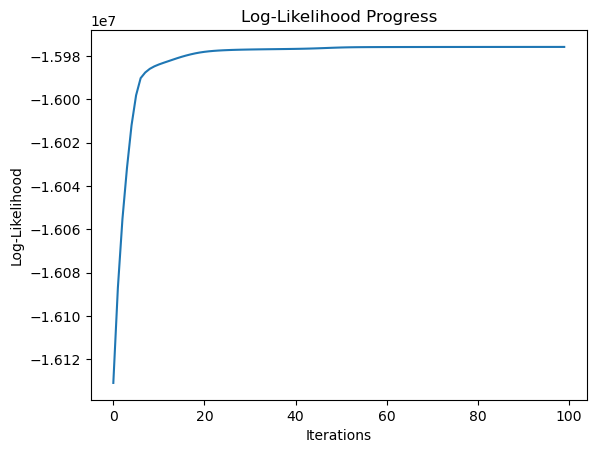

In [32]:
gmm_model = GMM(X_train_pca, n_components=10, max_iters=100, tol=1e-4)

phi, mu, sigma, responsibilities = gmm_model.fit()

# Plot the loss
plt.plot(gmm_model.history)
plt.title('Log-Likelihood Progress')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.show()


## Evaluate Clustering Using Normalized Mutual Information (NMI)

### Task Description
Compare the clustering performance of your implementations using Normalized Mutual Information scores.

### Required Comparisons
Calculate NMI scores between:
1. K-means labels vs Ground Truth labels
2. GMM labels vs Ground Truth labels
3. K-means labels vs GMM labels

In [33]:
from sklearn.metrics import normalized_mutual_info_score

# You can use sklearn's api
# measure the performance of the kmean model
y_pred_kmeans  = Kmeans_model.predict(X_test_pca)

print("NMI for Kmeans: ", normalized_mutual_info_score(y_test, y_pred_kmeans))


# measure the performance of the GMM model
y_pred_gmm = gmm_model.predict(X_test_pca)
print("NMI for GMM: ", normalized_mutual_info_score(y_test, y_pred_gmm))

# measure the performance of the GMM model against Kmeans
print("NMI for GMM vs Kmeans: ", normalized_mutual_info_score(y_test, y_pred_gmm))

NMI for Kmeans:  0.4920216918653283
NMI for GMM:  0.4547042546543612
NMI for GMM vs Kmeans:  0.4547042546543612


# **Problem Statement: 3**  

### **Important Note for Students:**  
In this assignment, you must provide **mathematical justification** for all your answers or statements used. **Avoid philosophical explanations or intuitive reasoning** without formal derivations. Without format derivations marks will not be awarded.

### **Questions:**  

1. **Student A and B are discussing the Expectation-Maximization (EM) algorithm and its effect on the likelihood function.**  
   - **A argues** that the likelihood function **always increases** with each iteration.  
   - **B, however, believes** that the likelihood function **can sometimes decrease or behave unpredictably**.  

   Who is correct? **Prove your answer mathematically.**  

---

2. Student A is working on a **binary classification problem** using **Logistic Regression**. However, he mistakenly uses **Mean Squared Error (MSE)** instead of **Binary Cross-Entropy (BCE) Loss** as the loss function while training his model. The optimization algorithm used is **Gradient Descent**. Assume all of his implementations of algorithms, preprocessing, etc are correct.
The features in the dataset are independent.
   - Will Student A get **good results, poor results, or is it impossible to determine?**  
   - **Provide a mathematical justification for your answer.** Equations and proofs are expected.

   Hint: Gradient descent converges to a local optimum.


### Answer
#### Q1  
EM Algorithm: Likelihood Monotonicity

Given a training dataset $(\{x^{(i)}\}_{i=1}^n)$ and a latent variable model with joint distribution $(p(x, z; \theta))$ where $(z)$ is a latent variable, the marginal likelihood for each data point is:  
$$
p(x^{(i)}; \theta) = \sum_{z} p(x^{(i)}, z; \theta).
$$  
Thus, the complete-data log-likelihood over the dataset is:  
$$
\ell(\theta) = \sum_{i=1}^n \log p(x^{(i)}; \theta) = \sum_{i=1}^n \log \left(\sum_{z} p(x^{(i)}, z; \theta)\right).
$$

##### Introducing an Auxiliary Distribution

For each \(i\), We introduce an arbitrary probability distribution $(Q_i(z))$ over the latent variable $(z)$. The log-likelihood can be rewritten as:  
$$
\ell(\theta) = \sum_{i=1}^n \log \left(\sum_{z} Q_i(z) \frac{p(x^{(i)}, z; \theta)}{Q_i(z)}\right).
$$  
Since the logarithm is a concave function, Jensen's inequality gives:  
$$
\log \left(\sum_{z} Q_i(z) \frac{p(x^{(i)}, z; \theta)}{Q_i(z)}\right) \ge \sum_{z} Q_i(z) \log \frac{p(x^{(i)}, z; \theta)}{Q_i(z)}.
$$  
Thus, we obtain a lower bound on the log-likelihood:  
$$
\ell(\theta) \ge \sum_{i=1}^n \sum_{z} Q_i(z) \log \frac{p(x^{(i)}, z; \theta)}{Q_i(z)}.
$$

##### Define the Evidence Lower Bound (ELBO)

ELBO :  
$$
\mathcal{L}(Q, \theta) = \sum_{i=1}^n \sum_{z} Q_i(z) \log \frac{p(x^{(i)}, z; \theta)}{Q_i(z)}.
$$  
Then the inequality becomes:  
$$
\ell(\theta) \ge \mathcal{L}(Q, \theta).
$$  
Equality is achieved if and only if, for each \(i\),  
$$
Q_i(z) \propto p(z \mid x^{(i)}; \theta).
$$

##### EM Algorithm Iterations

The EM algorithm proceeds in two steps:

###### E-step  
For the current parameter estimate $(\theta^{(t)})$, set:  
$$
Q_i^{(t)}(z) = p(z \mid x^{(i)}; \theta^{(t)}) /\sum_{z}p(z \mid x^{(i)}; \theta^{(t)}) .
$$  
This choice makes the ELBO tight:  
$$
\ell(\theta^{(t)}) = \mathcal{L}(Q^{(t)}, \theta^{(t)}).
$$

###### M-step  
update the parameter estimate by maximizing the ELBO:  
$$
\theta^{(t+1)} = \operatorname*{arg\,max}_{\theta}\, \mathcal{L}(Q^{(t)}, \theta).
$$

##### Monotonic Increase in the Likelihood

The parameters $\theta^{(t+1)}$ are then obtained by maximizing the right-hand side of the equation above.

With these updates, the following chain of inequalities holds:  
$$
\ell(\theta^{(t)}) = \mathcal{L}(Q^{(t)}, \theta^{(t)}) \le \mathcal{L}(Q^{(t)}, \theta^{(t+1)}) \le \ell(\theta^{(t+1)}).
$$  
This proves that:  
$$
\ell(\theta^{(t)}) \le \ell(\theta^{(t+1)}),
$$  
i.e., the log-likelihood (and thus the likelihood) does not decrease with each iteration of the EM algorithm.

##### Conclusion

Since the EM algorithm guarantees that:  
$$
\ell(\theta^{(t)}) \le \ell(\theta^{(t+1)}),
$$  
the likelihood is monotonically non-decreasing. Therefore, **None** of Student are correct.

### Q2

using **MSE loss** with a **sigmoid activation** for binary classification, the cost for a single averaged over examples is

$$
L(\mathbf{w}) = \frac{1}{n} \|\sigma(z) - \mathbf{y} \|_2^2.
$$

where:

$$
\mathbf{z} = X\mathbf{w}, \quad \sigma(\mathbf{z}) = \frac{1}{1+e^{-\mathbf{z}}}.
$$


$$
\mathbf{e} = \sigma(\mathbf{z}) - \mathbf{y}.
$$

The loss function can be rewritten as:

$$
L(\mathbf{w}) = \frac{1}{n} (\mathbf{e}^\top \mathbf{e}).
$$

Taking the gradient with respect to $(\mathbf{z})$, we apply the chain rule:

$$
\nabla_{\mathbf{z}} L(\mathbf{w}) = \frac{2}{n} \mathbf{e} \odot \frac{\partial \sigma(\mathbf{z})}{\partial \mathbf{z}}.
$$

Derivative of Sigmoid Function:

$$
\frac{\partial \sigma(\mathbf{z})}{\partial \mathbf{z}} = \sigma(\mathbf{z}) \odot (1 - \sigma(\mathbf{z})).
$$

Thus, we obtain:

$$
\nabla_{\mathbf{z}} L(\mathbf{w}) = \frac{2}{n} \mathbf{e} \odot \sigma(\mathbf{z}) \odot (1 - \sigma(\mathbf{z})).
$$

Since $( \mathbf{z} = X\mathbf{w} )$, applying the chain rule:

$$
\nabla_{\mathbf{w}} L(\mathbf{w}) = X^\top \nabla_{\mathbf{z}} L(\mathbf{w}).
$$

Substituting our expression for $( \nabla_{\mathbf{z}} L(\mathbf{w}))$:

$$
\nabla_{\mathbf{w}} L(\mathbf{w}) = \frac{2}{n} X^\top \Bigl[ (\sigma(X\mathbf{w}) - \mathbf{y}) \odot \sigma(X\mathbf{w}) \odot (1 - \sigma(X\mathbf{w})) \Bigr].
$$

when we use **BCE** loss, we get the Gradient update rule as 
$$
\nabla_{\mathbf{w}} L(\mathbf{w}) = \frac{2}{n} X^\top \Bigl[ (\sigma(X\mathbf{w}) - \mathbf{y}) \Bigr].
$$

While use **MSE** as loss function we can get the three stationary point, assuming X is not zero
$$\sigma(z) = 0, 1$$
$$\sigma(X\mathbf{w}) - \mathbf{y}) = 0$$

- $\sigma(X\mathbf{w}) \odot (1 - \sigma(X\mathbf{w}))$ reaches its maximum $(0.25)$ when $(\sigma(z)=0.5)$ (i.e., $(z=0))$.
$$
0 \le \nabla_{\mathbf{w}} L(\mathbf{w}) = \frac{2}{n} X^\top \Bigl[ (\sigma(X\mathbf{w}) - \mathbf{y}) \odot \sigma(X\mathbf{w}) \odot (1 - \sigma(X\mathbf{w})) \Bigr] \le \frac{1}{4} \frac{2}{n} X^\top \Bigl[ (\sigma(X\mathbf{w}) - \mathbf{y}) \Bigr].
$$
Because of this, even if the error $((\sigma(z_i) - y_i))$ is large, the effective gradient can be very small when the network outputs are near the boundaries (0 or 1). This has two key consequences:

1. **Slowed Convergence:**  
   When many neurons are in the saturation region, the small derivative $(\sigma(z)(1-\sigma(z)))$ “shrinks” the gradient updates. This makes it difficult for gradient descent to escape these regions, leading to slow or stalled learning.

2. **Behavior Similar to Non-Convexity in Finite Precision:**  
    In the saturation region, the gradient of the loss is nearly zero, causing gradient descent to take negligible steps. While this does not make the function inherently non-convex, in practical scenarios with finite precision, the optimization behaves as if it were stuck in local minima. However, given exact arithmetic and infinite time, the algorithm would still eventually converge to a solution.

Mathematically, the presence of multiple minima can be seen by considering that for a binary target $(y_i \in \{0,1\})$, trivial solutions such as $(\hat{y} = 0)$ (when \(z_i\) is very negative) or $(\hat{y} = 1)$ (when $(z_i)$ is very positive) both will lead to stationary point

$$
L(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^n (0 - y_i)^2 \quad \text{or} \quad L(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^n (1 - y_i)^2.
$$

These multiple solutions highlight the non-convexity of the MSE loss when used with a sigmoid, as there is no unique global minimum that gradient descent is guaranteed to find.


**Student A will likely get poor results.**  

**Justification:**  
- The extra multiplicative factor $(\sigma(z)(1-\sigma(z)))$ in the gradient significantly reduces the effective step size when the network saturates, causing very slow convergence or even stalling during training.
- The MSE loss with a sigmoid output leads to a non-convex optimization landscape with multiple local minima. Gradient descent is prone to getting stuck in these local minima, leading to suboptimal solutions.

Thus, even though all implementations are correct, using MSE instead of Binary Cross-Entropy for a binary classification problem results in poor training dynamics and, consequently, poor results.
